# Black Skimmer (Rynchops niger) Data Exploration Of US Gulf Coast Populations

## About this Project
In this project, my focus is dedicated to analyzing the population trends of the Black Skimmer along the expansive Gulf Coast of the United States, stretching from Texas to Florida. Utilizing data collected between 2010 and 2023, my primary objective is to uncover and understand any dynamic shifts in the distribution and abundance of these bird populations over this extended timeframe. To accomplish this, I will merge two distinct datasets: the first comprises submitted checklists gleaned from the comprehensive Cornell University Ebird database, while the second stems from species counts obtained through aerial surveys of the Gulf Coast barrier islands—a collaborative endeavor led by The Water Institute. This integration of datasets will yield a more holistic comprehension of avian populations along the Gulf Coast of the US than either dataset could individually provide.

The choice of the Black Skimmer is underpinned by two fundamental reasons. Firstly, my personal fascination with this species has led me to spend numerous early morning hours observing these birds gracefully skimming across the water's surface to capture fish. Secondly, and more importantly, the Black Skimmer's precarious situation warrants attention; its nesting habitat, comprising coastal sandy or gravelly bars, faces substantial threats from pollution and coastal erosion.


## About the Data

### Cornell University eBird Data

The eBird dataset, sourced from The Cornell Lab of Ornithology, comprises checklist submissions spanning from January 2010 to November 2023, specifically gathered from Texas, Louisiana, Mississippi, Alabama, and Florida. This dataset includes detailed information on the presence  of Black Skimmers as recorded in submitted checklists. Additionally, I've procured comprehensive effort data corresponding to the same time frame, allowing for an in-depth analysis of both the occurrence patterns and the instances where Black Skimmers were not observed within these submissions.

Citation: eBird Basic Dataset. Version: EBD_relNov-2023. Cornell Lab of Ornithology, Ithaca, New York. Nov 2023.

[More Info: https://ebird.org/about](https://ebird.org/about)

### The Water Institute Aerial Survey Data

The second dataset was sourced from The Water Institute's ["Avian Data Monitoring Portal"](https://experience.arcgis.com/experience/010503b4c64b4ff6a7f3570220a53647/page/Project-Information/). It comprises aerial surveys conducted via fixed-wing aircraft along the Gulf Coast from 2010 to 2021. These surveys aimed to count nests and nesting pairs of various avian species, covering diverse spatial extents across different years. Conducted primarily in May and June, with exceptions in 2010 due to airspace constraints during spill response and delayed identification of survey needs in certain areas, the dataset involves meticulous nest counting and categorization by species and nesting status. It serves to assess distribution trends, relative abundance, nest quantities, and breeding statuses of these avian populations.

[More Info: "2010-2021 COLONIAL WATERBIRD DATA READ-ME"](https://twi-aviandata.s3.amazonaws.com/avian_monitoring/dotting_information/ColibriReadMe_2010-2021_Final.pdf)


## Prepping the notebook

Below are the required libraries for this project. I have installed them into a conda environment using either the conda package manager or the pip package manger when the library was not available in conda. You may also install them from this notebook by removing the # symbol in front of the install commands.

Once we have installed the necessary libraries into our environment we will import them into the notebook.

In [1]:
# Required Libraries to install in your environment
#!pip install pandas
#!pip install geopandas
#!pip install shapely
#!pip install simplekml
#!pip install matplotlib
#!pip install geopy

In [2]:
# Below are the library imports needed for this project
import pandas as pd
pd.set_option('display.max_columns', 55) # set max width
pd.set_option('display.max_columns', 75) # set max length
import numpy as np
import geopandas as gpd
import glob
from shapely.geometry import Point, Polygon
import simplekml
from IPython.display import Image
import matplotlib.pyplot as plt
from geopy.distance import geodesic



In [3]:
# show plots inline
%matplotlib inline


## Importing the files into our notebook

We're working with multiple files that need to be imported, cleaned and then combined.

The first set are all of the eBird checklists from 01-2010 to 11-2023 in TX, LA, MS, AL and FL that contain an observation of a Black Skimmer.  I requested this data from https://ebird.org/data/download/ebd on 12-15-2023.

The second set is the sampling event data from the same time frame and locations.  This sample data is provided by eBird in conjunction with the checklist data.  This data will help us understand when Black Skimmers were NOT observed on submitted checklists.

The third dataset is The Water Institute data discussed above. I downloaded this from The Water Institute's ["Avian Data Monitoring Portal"](https://experience.arcgis.com/experience/010503b4c64b4ff6a7f3570220a53647/page/Project-Information/) on 12-15-2023


In [4]:
# importing eBird data into the notebook

blsk_ebird_file_paths = glob.glob('data_files/ebird_blsk_data/*.txt') # using glob to make a list for blsk observation data

sample_data_file_paths = glob.glob('data_files/ebird_sampling_data/*.txt') # using glob to make a list for sample data to gauge overall bird observation effort

# importing the water institute data into the notebook

twi_file_path = 'data_files/the_water_institute_data/the_water_institute_20102021.csv'

In [5]:
# Converting the ebird black skimmer observation data files into Pandas DataFrames for cleanup process

# ebird blsk dataframe
ebird_blsk_dfs = [] # initializing a list to store the sepearte dataframes before combining
for fp in blsk_ebird_file_paths: # a for loop to loop through the file path list, create a dataframe, then add the dataframe to the above list
    df = pd.read_csv(fp, sep='\t', low_memory=False)
    ebird_blsk_dfs.append(df)

ebird_blsk_df = pd.concat(ebird_blsk_dfs, ignore_index=True) #combine all the dataframes into one single dataframe

In [6]:
# Converting the ebird sample data files into Pandas DataFrames for cleanup process

ebird_sample_dfs = [] # initializing a list to store the sepearte dataframes before combining
for fp in sample_data_file_paths: # a for loop to loop through the file path list, create a dataframe, then add the dataframe to the above list
    df = pd.read_csv(fp, sep='\t', low_memory=False)
    ebird_sample_dfs.append(df)

ebird_sample_df = pd.concat(ebird_sample_dfs, ignore_index=True) #combine all the dataframes into one single dataframe

In [7]:
# Converting The Water Institute data file into a Pandas DataFrame

twi_df = pd.read_csv(twi_file_path, low_memory=False)

## Initial Exploration

Below is an initial exploration of our datasets.  My goal is to create a PLAN to do the following:
* Reduce the size by removing unnecessary columns
* Decide which columns need a change of datatype
* Create a column naming convention to align all the datasets
* Decide if I need to confine the data to a more confined location
* Prep the datasets to be combined into a single dataset

In [8]:
# exploring the columns and data types for the ebird_blsk_df
ebird_blsk_df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202675 entries, 0 to 202674
Data columns (total 50 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GLOBAL UNIQUE IDENTIFIER    202675 non-null  object 
 1   LAST EDITED DATE            202675 non-null  object 
 2   TAXONOMIC ORDER             202675 non-null  int64  
 3   CATEGORY                    202675 non-null  object 
 4   TAXON CONCEPT ID            202675 non-null  object 
 5   COMMON NAME                 202675 non-null  object 
 6   SCIENTIFIC NAME             202675 non-null  object 
 7   SUBSPECIES COMMON NAME      2686 non-null    object 
 8   SUBSPECIES SCIENTIFIC NAME  2686 non-null    object 
 9   EXOTIC CODE                 0 non-null       float64
 10  OBSERVATION COUNT           202675 non-null  object 
 11  BREEDING CODE               1427 non-null    object 
 12  BREEDING CATEGORY           1427 non-null    object 
 13  BEHAVIOR CODE 

In [9]:
ebird_blsk_df.head()

GLOBAL UNIQUE IDENTIFIER            LAST EDITED DATE  \
0  URN:CornellLabOfOrnithology:EBIRD:OBS111433373  2023-01-07 22:09:17.595572   
1  URN:CornellLabOfOrnithology:EBIRD:OBS296721702   2023-10-17 06:51:10.61756   
2  URN:CornellLabOfOrnithology:EBIRD:OBS138881131         2014-03-07 12:36:40   
3  URN:CornellLabOfOrnithology:EBIRD:OBS118669494         2014-01-26 15:44:02   
4  URN:CornellLabOfOrnithology:EBIRD:OBS118497087  2021-03-25 09:38:16.242155   

   TAXONOMIC ORDER CATEGORY  TAXON CONCEPT ID    COMMON NAME SCIENTIFIC NAME  \
0             6567  species  avibase-88AB027C  Black Skimmer  Rynchops niger   
1             6567  species  avibase-88AB027C  Black Skimmer  Rynchops niger   
2             6567  species  avibase-88AB027C  Black Skimmer  Rynchops niger   
3             6567  species  avibase-88AB027C  Black Skimmer  Rynchops niger   
4             6567  species  avibase-88AB027C  Black Skimmer  Rynchops niger   

  SUBSPECIES COMMON NAME SUBSPECIES SCIENTIFIC NAME  EXOTIC CODE  \
0                    NaN                        NaN          NaN   
1                    NaN                        NaN          NaN   
2                    NaN                        NaN          NaN   
3                    NaN                        NaN          NaN   
4                    NaN                        NaN          NaN   

  OBSERVATION COUNT BREEDING CODE BREEDING CATEGORY BEHAVIOR CODE AGE/SEX  \
0                 1           NaN               NaN           NaN     NaN   
1                10           NaN               NaN           NaN     NaN   
2                 5           NaN               NaN           NaN     NaN   
3                10           NaN               NaN           NaN     NaN   
4                 2           NaN               NaN           NaN     NaN   

         COUNTRY COUNTRY CODE    STATE STATE CODE   COUNTY COUNTY CODE  \
0  United States           US  Alabama      US-AL  Baldwin   US-AL-003   
1  United States           US  Alabama      US-AL  Baldwin   US-AL-003   
2  United States           US  Alabama      US-AL  Baldwin   US-AL-003   
3  United States           US  Alabama      US-AL  Baldwin   US-AL-003   
4  United States           US  Alabama      US-AL  Baldwin   US-AL-003   

     IBA CODE  BCR CODE USFWS CODE  ATLAS BLOCK  \
0         NaN       NaN        NaN          NaN   
1         NaN       NaN        NaN          NaN   
2  US-AL_2618      27.0        NaN          NaN   
3         NaN       NaN        NaN          NaN   
4         NaN       NaN        NaN          NaN   

                          LOCALITY LOCALITY ID LOCALITY TYPE   LATITUDE  \
0      Week's Bay NERR Swift Tract    L1105594             P  30.329990   
1         Gulf Shores Public Beach    L2583905             H  30.247396   
2  Fort Morgan State Historic Site     L165792             H  30.229445   
3           Gulf SP--Alabama Point     L485423             H  30.273226   
4      Grande Pointe, Orange Beach     L996450             P  30.270938   

   LONGITUDE OBSERVATION DATE TIME OBSERVATIONS STARTED OBSERVER ID  \
0 -87.803593       2011-01-29                  11:30:00  obsr241214   
1 -87.690372       2011-03-26                  16:45:00  obsr197968   
2 -88.018043       2011-04-28                  10:00:00  obsr169189   
3 -87.553396       2011-05-16                  14:10:00  obsr228192   
4 -87.560123       2011-05-15                  06:30:00  obsr228192   

  SAMPLING EVENT IDENTIFIER PROTOCOL TYPE PROTOCOL CODE PROJECT CODE  \
0                  S7784248          Area           P23        EBIRD   
1                 S21824300     Traveling           P22        EBIRD   
2                  S9801593    Incidental           P20        EBIRD   
3                  S8256499     Traveling           P22        EBIRD   
4                  S8246919     Traveling           P22        EBIRD   

   DURATION MINUTES  EFFORT DISTANCE KM  EFFORT AREA HA  NUMBER OBSERVERS  \
0             150.0                 NaN      

### Thoughts and plan for cleaning on the eBird dataset 
Columns:
0: I'll keep the GUI in case we need some sort of unique identifier later

1: Last edited date isn't needed. We have an observation date in col 30

2-9: We won't need taxonomic information or species information since this set only includes the Black Skimmer Species 

10: We'll keep Observation count

11-14: Breeding/Behavior data.  This is very sparse, we need to explore this further.  The TWI dataset also includes sparse information on breeding/behavior observations

15-20: these columns contain location information and codes.  We'll keep the state code (18) and county name (19) for now. They may prove useful later

21-24: These columns won't be needed

25-26: Keep hotpsot names and unique location id

27: locality type will show is if someone chooses a generalized state, or county and not a specific hotspot.  keep to remove generalized data.

28-29: latitude and longitude data. keep 

30: Observation date. keep and convert to timestamp64 datatype mm-dd-yyyy format

31: Time info is more detailed than we need

32: Observer ID. don't need

33: Sampling event ID, keep for now

34-43: Effort data about how the data was collected. Not useful for this exploration

44-46: Approved/Reviewal information. Only approved data was included in the download. not needed

47-49: Comments. Don't need

In [10]:
ebird_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8456498 entries, 0 to 8456497
Data columns (total 31 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   LAST EDITED DATE           object 
 1   COUNTRY                    object 
 2   COUNTRY CODE               object 
 3   STATE                      object 
 4   STATE CODE                 object 
 5   COUNTY                     object 
 6   COUNTY CODE                object 
 7   IBA CODE                   object 
 8   BCR CODE                   float64
 9   USFWS CODE                 object 
 10  ATLAS BLOCK                float64
 11  LOCALITY                   object 
 12  LOCALITY ID                object 
 13  LOCALITY TYPE              object 
 14  LATITUDE                   float64
 15  LONGITUDE                  float64
 16  OBSERVATION DATE           object 
 17  TIME OBSERVATIONS STARTED  object 
 18  OBSERVER ID                object 
 19  SAMPLING EVENT IDENTIFIER  object 
 20  PR

In [11]:
ebird_sample_df.head()

LAST EDITED DATE        COUNTRY COUNTRY CODE    STATE STATE CODE  \
0  2022-11-28 16:31:05.826015  United States           US  Alabama      US-AL   
1  2022-09-16 10:10:20.982889  United States           US  Alabama      US-AL   
2  2022-03-03 14:07:34.032148  United States           US  Alabama      US-AL   
3   2023-04-20 13:51:28.57616  United States           US  Alabama      US-AL   
4  2022-03-14 11:59:44.890903  United States           US  Alabama      US-AL   

    COUNTY COUNTY CODE IBA CODE  BCR CODE USFWS CODE  ATLAS BLOCK  \
0  Autauga   US-AL-001      NaN      27.0        NaN          NaN   
1  Madison   US-AL-089      NaN      24.0        NaN          NaN   
2  Madison   US-AL-089      NaN      24.0        NaN          NaN   
3  Calhoun   US-AL-015      NaN      28.0        NaN          NaN   
4      Lee   US-AL-081      NaN      29.0        NaN          NaN   

                                            LOCALITY LOCALITY ID  \
0  539–599 County Road 21 S, Prattville US-AL 32....   L11869646   
1  1709 Mont Dale Rd SE, Huntsville US-AL 34.7212...   L11873283   
2  1709 Mont Dale Rd SE, Huntsville US-AL 34.7212...   L11873283   
3                         Alexandria: Parents' House   L11875071   
4            36879, Auburn US-AL 32.72652, -85.54671   L11876809   

  LOCALITY TYPE   LATITUDE  LONGITUDE OBSERVATION DATE  \
0             P  32.388754 -86.598185       2022-11-28   
1             P  34.721288 -86.556969       2022-09-16   
2             P  34.721288 -86.556969       2022-03-03   
3             P  33.782315 -85.872334       2022-05-08   
4             P  32.726524 -85.546715       2022-03-14   

  TIME OBSERVATIONS STARTED OBSERVER ID SAMPLING EVENT IDENTIFIER  \
0                  15:20:00   obs665305                S123177737   
1                  06:54:00   obs236177                S118833915   
2                  07:13:00   obs236177                S104098125   
3                  14:10:00  obs1639620                S109361653   
4                  10:39:00  obs1714795                S104811825   

  PROTOCOL TYPE PROTOCOL CODE PROJECT CODE  DURATION MINUTES  \
0     Traveling           P22        EBIRD              10.0   
1    Stationary           P21        EBIRD              80.0   
2    Stationary           P21    EBIRD_MEX             150.0   
3     Traveling           P22        EBIRD              21.0   
4     Traveling           P22        EBIRD              20.0   

   EFFORT DISTANCE KM  EFFORT AREA HA  NUMBER OBSERVERS  ALL SPECIES REPORTED  \
0               0.678             NaN               1.0                   1.0   
1                 NaN             NaN               1.0                   1.0   
2                 NaN             NaN               1.0                   1.0   
3               0.348             NaN               1.0                   1.0   
4               0.296             NaN               1.0                   1.0   

  GROUP IDENTIFIER                                      TRIP COMMENTS  \
0              NaN  Some water back in water feature in bend of ro...   
1              NaN                           Clear, wind calm, 68 deg   
2              NaN                             Clear, wind calm, 72°.   
3              NaN                                                NaN   
4              NaN                                                NaN   

   Unnamed: 30  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

### Thoughts and plan for cleaning on the eBird Sampling Data

This is 2GB in size.  We need to really narrow down by location data as a early step to reduce the size

Columns:

0: Dont need edit date

1-10: Location identifiers. Keeping only State Code and County (4,5)

11: keeping hotspot name

12: keeping location id

13: Location type won't need for this

14-15: Lat/Lon will be used to narrow down the data

16: observation date needs to be converted to timestamp64 mm-dd-yyyy

17: observation start time. don't need

18: Observer id: Don't need but will keep to create a uid then delete

19: Sampling event id: needed to match with records in the black skimmer data.

20-30: Effort data and comments not needed.

In [12]:
twi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49204 entries, 0 to 49203
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   49204 non-null  int64  
 1   Date                   49204 non-null  object 
 2   ColonyName             49204 non-null  object 
 3   Latitude_x             9539 non-null   float64
 4   Longitude_x            9539 non-null   float64
 5   DottingAreaNumber      49204 non-null  object 
 6   CameraNumber           49204 non-null  int64  
 7   CardNumber             49014 non-null  object 
 8   PhotoNumber            49204 non-null  int64  
 9   PQ                     49204 non-null  object 
 10  SpeciesCode            49160 non-null  object 
 11  WBN                    49204 non-null  float64
 12  ChickNestwithoutAdult  49203 non-null  float64
 13  AbandNest              49203 non-null  float64
 14  EmptyNest              49203 non-null  float64
 15  PB

In [13]:
# exploring structure of the uid
print(twi_df['uid'][1])

avian_monitoring/high_resolution_photos/2010/Biloxi South/Biloxi South 2/08May10Camera1-Card1-0012.jpg#LAGU


In [14]:
twi_df.head()

Year               Date      ColonyName  Latitude_x  Longitude_x  \
0  2010  05/08/10 00:00:00  Biloxi South 2     29.7047     -89.5647   
1  2010  05/08/10 00:00:00  Biloxi South 2     29.7047     -89.5647   
2  2010  05/08/10 00:00:00  Biloxi South 2     29.7047     -89.5647   
3  2010  05/08/10 00:00:00  Biloxi South 2     29.7047     -89.5647   
4  2010  05/08/10 00:00:00  Biloxi South 2     29.7047     -89.5647   

  DottingAreaNumber  CameraNumber CardNumber  PhotoNumber PQ SpeciesCode  WBN  \
0                 1             1          1           12  E        FOTE  0.0   
1                 1             1          1           12  E        LAGU  0.0   
2                 2             1          1            4  E        LAGU  0.0   
3                 2             1          1            4  E        SNEG  0.0   
4                 3             1          1            8  E        FOTE  0.0   

   ChickNestwithoutAdult  AbandNest  EmptyNest  PBN  Site  Brood  \
0                    0.0        0.0        0.0  0.0   7.0    0.0   
1                    0.0        0.0        0.0  0.0   0.0    0.0   
2                    0.0        0.0        0.0  0.0   0.0    0.0   
3                    0.0        0.0        0.0  0.0   0.0    0.0   
4                    0.0        0.0        0.0  0.0  48.0    0.0   

   OtherAdultsInColony  OtherImmInColony  Chicks/Nestlings  RoostingBirds  \
0                  0.0               0.0               0.0            0.0   
1                  1.0               0.0               0.0            0.0   
2                  0.0               0.0               0.0           10.0   
3                  0.0               0.0               0.0            1.0   
4                 15.0               0.0               0.0            0.0   

   RoostingAdults  RoostingImmatures  UnknownAge Dotter  Dotter'sColonyNumber  \
0             0.0                0.0         0.0    PJC                   1.0   
1             0.0                0.0         0.0    PJC                   1.0   
2             0.0                0.0         0.0    PJC                   1.0   
3             0.0                0.0         0.0    PJC                   1.0   
4             0.0                0.0         0.0    PJC                   1.0   

          DateDotted Notes BestForBPE  ChicksNestlings AdditionalNotes  \
0  12/04/10 00:00:00   NaN          Y              NaN             NaN   
1  12/04/10 00:00:00   NaN          Y              NaN             NaN   
2  12/04/10 00:00:00   NaN          Y              NaN             NaN   
3  12/04/10 00:00:00   NaN          Y              NaN             NaN   
4  12/04/10 00:00:00   NaN          Y              NaN             NaN   

  Subcolony  ChickNest  Territory  OtherBirds ColonyID ActiveInventory  \
0       NaN        NaN        NaN         NaN     BS_2             Yes   
1       NaN        NaN        NaN         NaN     BS_2             Yes   
2       NaN        NaN        NaN         NaN     BS_2             Yes   
3       NaN        NaN        NaN         NaN     BS_2             Yes   
4       NaN        NaN        NaN         NaN     BS_2             Yes   

  ColonyGroupBuffer State  Longitude_y  Latitude_y PrimaryHabitat  LandForm  \
0    Biloxi South 2    LA     -89.5647     29.7047            NaN       NaN   
1    Biloxi South 2    LA     -89.5647     29.7047            NaN       NaN   
2    Biloxi South 2    LA     -89.5647     29.7047            NaN       NaN   
3    Biloxi South 2    LA     -89.5647     29.7047            NaN       NaN   
4    Biloxi South 2    LA     -89.5647     29.7047            NaN       NaN   

      GeoRegion       ExtrapArea                             TerrestEcoRegion  \
0  Biloxi South  Coastal Marshes  Deltaic Coastal Marshes and Barrier Islands   
1  Biloxi South  Coastal Marshes  Deltaic Coastal Marshes and Barrier Islands   
2  Biloxi South  Coastal Marshes  Deltaic Coastal Marshes and Barrier Islands   
3  Biloxi South  Coastal Marshes  Deltaic

### Thoughts and plan for cleaning on the TWI data

Columns:

0: Year. Don't need we have a date column

1: Date. convert to timetamp64 mm-dd-yyyy

2: ColonyName. keep as we may be able to add this data to the ebird data

3-4: Lat/Long_x these columns look like the result of a pandas join earlier. lots of null values.  cols 40-41 have no null values

5-8: Effort/Camera details captured later in the UID

9: Don't know what this is. drop

10: SpeciesCode. Use to filter for Black Skimmer

11: WBN don't know what this is. drop

12-14: Breeding data. Save for now

15-16: Not sure what this is. drop

17: Brood. potential breeding info. save

18-19: Other species seen. drop

20-24: potential breeding data. save

25-28: Dotting effort info (dotting is the process of identifying birds in pic)

29: Best for BPE. Don't know what this is

30-33: more nesting info. keep to explore

34: Territory. drop

35: OTher birds. drop

36: Colony ID: keep

37: Active Inventory: Drop

38: ColonyGroupBuffer: drop

39: State. keep

40-41: lat/long. keep

42-43: habitat info almost all null values. drop

44-47: habitat info. no null values. keep for further exploration

48: former names. drop

49: dotter info. drop

50: notes: drop

51-53: image urls. drop

54: nest counts: keep for now not sure if i'll use

55: total count: keep

56-57: more date info. duplicate

58: uid. keep

59: more date detail info. I will use the timestamp to further investigate instead of using these. drop


## Initial Cleaning and Organizing of the Data

Following the plans outlined above I will be dropping unneeded columns and formating the datatypes if necessary.

### Cleaning and organizing the eBird Black Skimmer Dataset


In [15]:
# cleaning the ebird black skimmer dataset

ebird_cols_to_drop = [1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 16, 17, 20, 21, 22, 23, 24, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]

ebird_blsk_df.drop(ebird_blsk_df.columns[ebird_cols_to_drop], axis=1, inplace=True)

ebird_blsk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202675 entries, 0 to 202674
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   GLOBAL UNIQUE IDENTIFIER   202675 non-null  object 
 1   OBSERVATION COUNT          202675 non-null  object 
 2   BREEDING CODE              1427 non-null    object 
 3   BREEDING CATEGORY          1427 non-null    object 
 4   BEHAVIOR CODE              1427 non-null    object 
 5   AGE/SEX                    956 non-null     object 
 6   STATE CODE                 202675 non-null  object 
 7   COUNTY                     202647 non-null  object 
 8   LOCALITY                   202675 non-null  object 
 9   LOCALITY ID                202675 non-null  object 
 10  LOCALITY TYPE              202675 non-null  object 
 11  LATITUDE                   202675 non-null  float64
 12  LONGITUDE                  202675 non-null  float64
 13  OBSERVATION DATE           20

In [16]:
# renaming the columns of the ebird black skimmer dataset

ebird_blsk_column_rename = {
    'GLOBAL UNIQUE IDENTIFIER': 'gui',
    'OBSERVATION COUNT': 'count',
    'BREEDING CODE': 'breeding_code',
    'BREEDING CATEGORY': 'breeding_cat',
    'BEHAVIOR CODE': 'behavior_code',
    'AGE/SEX': 'age_sex',
    'STATE CODE': 'state',
    'COUNTY': 'county',
    'LOCALITY':'locality_name',
    'LOCALITY ID': 'locality_id',
    'LOCALITY TYPE': 'locality_type',
    'LATITUDE': 'lat',
    'LONGITUDE': 'lon',
    'OBSERVATION DATE': 'date',
    'SAMPLING EVENT IDENTIFIER': 'checklist_id'
}

ebird_blsk_df.rename(columns=ebird_blsk_column_rename, inplace=True)

ebird_blsk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202675 entries, 0 to 202674
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gui            202675 non-null  object 
 1   count          202675 non-null  object 
 2   breeding_code  1427 non-null    object 
 3   breeding_cat   1427 non-null    object 
 4   behavior_code  1427 non-null    object 
 5   age_sex        956 non-null     object 
 6   state          202675 non-null  object 
 7   county         202647 non-null  object 
 8   locality_name  202675 non-null  object 
 9   locality_id    202675 non-null  object 
 10  locality_type  202675 non-null  object 
 11  lat            202675 non-null  float64
 12  lon            202675 non-null  float64
 13  date           202675 non-null  object 
 14  checklist_id   202675 non-null  object 
dtypes: float64(2), object(13)
memory usage: 23.2+ MB


In [17]:
# convert the date column from object to timestamp

ebird_blsk_df['date'] = pd.to_datetime(ebird_blsk_df['date'])

ebird_blsk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202675 entries, 0 to 202674
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gui            202675 non-null  object        
 1   count          202675 non-null  object        
 2   breeding_code  1427 non-null    object        
 3   breeding_cat   1427 non-null    object        
 4   behavior_code  1427 non-null    object        
 5   age_sex        956 non-null     object        
 6   state          202675 non-null  object        
 7   county         202647 non-null  object        
 8   locality_name  202675 non-null  object        
 9   locality_id    202675 non-null  object        
 10  locality_type  202675 non-null  object        
 11  lat            202675 non-null  float64       
 12  lon            202675 non-null  float64       
 13  date           202675 non-null  datetime64[ns]
 14  checklist_id   202675 non-null  object        
dtype

In [18]:
# Parsing out the State column to remove the "US-" portion of the column

ebird_blsk_df['state'] = ebird_blsk_df['state'].str.replace('US-', '')

ebird_blsk_df.head()

gui count breeding_code  \
0  URN:CornellLabOfOrnithology:EBIRD:OBS111433373     1           NaN   
1  URN:CornellLabOfOrnithology:EBIRD:OBS296721702    10           NaN   
2  URN:CornellLabOfOrnithology:EBIRD:OBS138881131     5           NaN   
3  URN:CornellLabOfOrnithology:EBIRD:OBS118669494    10           NaN   
4  URN:CornellLabOfOrnithology:EBIRD:OBS118497087     2           NaN   

  breeding_cat behavior_code age_sex state   county  \
0          NaN           NaN     NaN    AL  Baldwin   
1          NaN           NaN     NaN    AL  Baldwin   
2          NaN           NaN     NaN    AL  Baldwin   
3          NaN           NaN     NaN    AL  Baldwin   
4          NaN           NaN     NaN    AL  Baldwin   

                     locality_name locality_id locality_type        lat  \
0      Week's Bay NERR Swift Tract    L1105594             P  30.329990   
1         Gulf Shores Public Beach    L2583905             H  30.247396   
2  Fort Morgan State Historic Site     L165792             H  30.229445   
3           Gulf SP--Alabama Point     L485423             H  30.273226   
4      Grande Pointe, Orange Beach     L996450             P  30.270938   

         lon       date checklist_id  
0 -87.803593 2011-01-29     S7784248  
1 -87.690372 2011-03-26    S21824300  
2 -88.018043 2011-04-28     S9801593  
3 -87.553396 2011-05-16     S8256499  
4 -87.560123 2011-05-15     S8246919

In [19]:
# explore the 'count' column to see what needs to be changed to convert to an int or float?

ebird_blsk_df['count'].value_counts().reset_index(name='totals').head(10)

count  totals
0     1   26820
1     2   17500
2     X   15496
3     3    9713
4     4    7308
5     5    6160
6    50    5899
7   100    5368
8    20    5140
9     6    5072

In [20]:
# eBird uses and 'X' to signify that the species was present but no count was made.
# My plan is to add a 1/0 column to signify presence or not presence of the Black Skimmer in the checklist.
# Everything will be 1 for this dataframe.
# For the 'count' column I will convert it to a float and have the 'x' values be NaN

ebird_blsk_df['presence'] = 1

ebird_blsk_df['count'] = pd.to_numeric(ebird_blsk_df['count'], errors='coerce')

ebird_blsk_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202675 entries, 0 to 202674
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gui            202675 non-null  object        
 1   count          187179 non-null  float64       
 2   breeding_code  1427 non-null    object        
 3   breeding_cat   1427 non-null    object        
 4   behavior_code  1427 non-null    object        
 5   age_sex        956 non-null     object        
 6   state          202675 non-null  object        
 7   county         202647 non-null  object        
 8   locality_name  202675 non-null  object        
 9   locality_id    202675 non-null  object        
 10  locality_type  202675 non-null  object        
 11  lat            202675 non-null  float64       
 12  lon            202675 non-null  float64       
 13  date           202675 non-null  datetime64[ns]
 14  checklist_id   202675 non-null  object        
 15  

In [21]:
# Checking to see the difference between the columns 'breeding_code' and 'behavior_code' since they look the same.
ebird_blsk_df[['behavior_code', 'breeding_code']].value_counts().reset_index(name='totals')

behavior_code breeding_code  totals
0             F             F      333
1             ON            ON     245
2             FL            FL     172
3             H             H      139
4             NY            NY     121
5             NE            NE     113
6             FY            FY      96
7             C             C       57
8             N             N       47
9             P             P       35
10            CF            CF      26
11            NB            NB      17
12            A             A        8
13             M             M       4
14            S             S        4
15            UN            UN       4
16            PE            PE       3
17            CN            CN       1
18            S7            S7       1
19            T             T        1

In [22]:
# checking to see if they are identical
are_identical = ebird_blsk_df['breeding_code'].equals(ebird_blsk_df['behavior_code'])
print(are_identical)

True


In [23]:
# dropping 'behavior_code' since its a duplicate
ebird_blsk_df.drop('behavior_code', axis=1, inplace=True)
ebird_blsk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202675 entries, 0 to 202674
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gui            202675 non-null  object        
 1   count          187179 non-null  float64       
 2   breeding_code  1427 non-null    object        
 3   breeding_cat   1427 non-null    object        
 4   age_sex        956 non-null     object        
 5   state          202675 non-null  object        
 6   county         202647 non-null  object        
 7   locality_name  202675 non-null  object        
 8   locality_id    202675 non-null  object        
 9   locality_type  202675 non-null  object        
 10  lat            202675 non-null  float64       
 11  lon            202675 non-null  float64       
 12  date           202675 non-null  datetime64[ns]
 13  checklist_id   202675 non-null  object        
 14  presence       202675 non-null  int64         
dtype

### Cleaning and Organizing the eBird Sampling Data

In [24]:
# dropping columns not needed

sampling_cols_to_drop = [0, 1, 2, 3, 6, 7, 8, 9, 10, 13, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

ebird_sample_df.drop(ebird_sample_df.columns[sampling_cols_to_drop], axis=1, inplace=True)

ebird_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8456498 entries, 0 to 8456497
Data columns (total 9 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   STATE CODE                 object 
 1   COUNTY                     object 
 2   LOCALITY                   object 
 3   LOCALITY ID                object 
 4   LATITUDE                   float64
 5   LONGITUDE                  float64
 6   OBSERVATION DATE           object 
 7   OBSERVER ID                object 
 8   SAMPLING EVENT IDENTIFIER  object 
dtypes: float64(2), object(7)
memory usage: 580.7+ MB


In [25]:
# renaming the columns for consistency

sampling_cols_rename = {
    'STATE CODE': 'state',
    'COUNTY': 'county',
    'LOCALITY': 'locality_name',
    'LOCALITY ID': 'locality_id',
    'LATITUDE': 'lat',
    'LONGITUDE': 'lon',
    'OBSERVATION DATE': 'date',
    'OBSERVER ID' : 'observer_id',
    'SAMPLING EVENT IDENTIFIER': 'checklist_id'
}

ebird_sample_df.rename(columns=sampling_cols_rename, inplace=True)

ebird_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8456498 entries, 0 to 8456497
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   state          object 
 1   county         object 
 2   locality_name  object 
 3   locality_id    object 
 4   lat            float64
 5   lon            float64
 6   date           object 
 7   observer_id    object 
 8   checklist_id   object 
dtypes: float64(2), object(7)
memory usage: 580.7+ MB


In [26]:
# convert the date column from object to timestamp

ebird_sample_df['date'] = pd.to_datetime(ebird_sample_df['date'])

ebird_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8456498 entries, 0 to 8456497
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   state          object        
 1   county         object        
 2   locality_name  object        
 3   locality_id    object        
 4   lat            float64       
 5   lon            float64       
 6   date           datetime64[ns]
 7   observer_id    object        
 8   checklist_id   object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 580.7+ MB


In [27]:
# create a GUI for this dataset using multiple columns combined to ensure a unique key

ebird_sample_df['gui'] = ebird_sample_df['observer_id'].astype(str) + ':' + ebird_sample_df['checklist_id'].astype(str) + ':' + ebird_sample_df['date'].astype(str)

ebird_sample_df.head()

state   county                                      locality_name  \
0  US-AL  Autauga  539–599 County Road 21 S, Prattville US-AL 32....   
1  US-AL  Madison  1709 Mont Dale Rd SE, Huntsville US-AL 34.7212...   
2  US-AL  Madison  1709 Mont Dale Rd SE, Huntsville US-AL 34.7212...   
3  US-AL  Calhoun                         Alexandria: Parents' House   
4  US-AL      Lee            36879, Auburn US-AL 32.72652, -85.54671   

  locality_id        lat        lon       date observer_id checklist_id  \
0   L11869646  32.388754 -86.598185 2022-11-28   obs665305   S123177737   
1   L11873283  34.721288 -86.556969 2022-09-16   obs236177   S118833915   
2   L11873283  34.721288 -86.556969 2022-03-03   obs236177   S104098125   
3   L11875071  33.782315 -85.872334 2022-05-08  obs1639620   S109361653   
4   L11876809  32.726524 -85.546715 2022-03-14  obs1714795   S104811825   

                                gui  
0   obs665305:S123177737:2022-11-28  
1   obs236177:S118833915:2022-09-16  
2   obs236177:S104098125:2022-03-03  
3  obs1639620:S109361653:2022-05-08  
4  obs1714795:S104811825:2022-03-14

In [28]:
# Parsing out the State column to remove the "US-" portion of the column

ebird_sample_df['state'] = ebird_sample_df['state'].str.replace('US-', '')

ebird_sample_df.head()

state   county                                      locality_name  \
0    AL  Autauga  539–599 County Road 21 S, Prattville US-AL 32....   
1    AL  Madison  1709 Mont Dale Rd SE, Huntsville US-AL 34.7212...   
2    AL  Madison  1709 Mont Dale Rd SE, Huntsville US-AL 34.7212...   
3    AL  Calhoun                         Alexandria: Parents' House   
4    AL      Lee            36879, Auburn US-AL 32.72652, -85.54671   

  locality_id        lat        lon       date observer_id checklist_id  \
0   L11869646  32.388754 -86.598185 2022-11-28   obs665305   S123177737   
1   L11873283  34.721288 -86.556969 2022-09-16   obs236177   S118833915   
2   L11873283  34.721288 -86.556969 2022-03-03   obs236177   S104098125   
3   L11875071  33.782315 -85.872334 2022-05-08  obs1639620   S109361653   
4   L11876809  32.726524 -85.546715 2022-03-14  obs1714795   S104811825   

                                gui  
0   obs665305:S123177737:2022-11-28  
1   obs236177:S118833915:2022-09-16  
2   obs236177:S104098125:2022-03-03  
3  obs1639620:S109361653:2022-05-08  
4  obs1714795:S104811825:2022-03-14

In [29]:
# drop the observer_id as its not needed anymore

ebird_sample_df.drop('observer_id', axis=1, inplace=True)

ebird_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8456498 entries, 0 to 8456497
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   state          object        
 1   county         object        
 2   locality_name  object        
 3   locality_id    object        
 4   lat            float64       
 5   lon            float64       
 6   date           datetime64[ns]
 7   checklist_id   object        
 8   gui            object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 580.7+ MB


### Cleaning and Organizing the TWI data

In [30]:
# dropping the columns we don't need

cols_to_drop_twi = [0, 3, 4, 5, 6, 7, 8, 9, 11, 15, 16, 18, 19, 25, 26,  27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 42, 43, 48, 49, 50, 51, 52, 53, 56, 57, 59]

twi_df.drop(twi_df.columns[cols_to_drop_twi], axis=1, inplace=True)

twi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49204 entries, 0 to 49203
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   49204 non-null  object 
 1   ColonyName             49204 non-null  object 
 2   SpeciesCode            49160 non-null  object 
 3   ChickNestwithoutAdult  49203 non-null  float64
 4   AbandNest              49203 non-null  float64
 5   EmptyNest              49203 non-null  float64
 6   Brood                  49204 non-null  float64
 7   Chicks/Nestlings       9539 non-null   float64
 8   RoostingBirds          25457 non-null  float64
 9   RoostingAdults         25457 non-null  float64
 10  RoostingImmatures      25457 non-null  float64
 11  UnknownAge             25457 non-null  float64
 12  ColonyID               49204 non-null  object 
 13  State                  49204 non-null  object 
 14  Longitude_y            49204 non-null  float64
 15  La

In [31]:
# rename columns to match other datasets. 

cols_to_rename_twi = {
    'Date':'date',
    'State': 'state',
    'Longitude_y': 'lon',
    'Latitude_y': 'lat',
    'uid': 'gui'
}

twi_df.rename(columns=cols_to_rename_twi, inplace=True)

twi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49204 entries, 0 to 49203
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   49204 non-null  object 
 1   ColonyName             49204 non-null  object 
 2   SpeciesCode            49160 non-null  object 
 3   ChickNestwithoutAdult  49203 non-null  float64
 4   AbandNest              49203 non-null  float64
 5   EmptyNest              49203 non-null  float64
 6   Brood                  49204 non-null  float64
 7   Chicks/Nestlings       9539 non-null   float64
 8   RoostingBirds          25457 non-null  float64
 9   RoostingAdults         25457 non-null  float64
 10  RoostingImmatures      25457 non-null  float64
 11  UnknownAge             25457 non-null  float64
 12  ColonyID               49204 non-null  object 
 13  state                  49204 non-null  object 
 14  lon                    49204 non-null  float64
 15  la

In [32]:
# convert date column to datetime

twi_df['date'] = pd.to_datetime(twi_df['date'].str.split(' ').str[0], format='%m/%d/%y')

twi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49204 entries, 0 to 49203
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   49204 non-null  datetime64[ns]
 1   ColonyName             49204 non-null  object        
 2   SpeciesCode            49160 non-null  object        
 3   ChickNestwithoutAdult  49203 non-null  float64       
 4   AbandNest              49203 non-null  float64       
 5   EmptyNest              49203 non-null  float64       
 6   Brood                  49204 non-null  float64       
 7   Chicks/Nestlings       9539 non-null   float64       
 8   RoostingBirds          25457 non-null  float64       
 9   RoostingAdults         25457 non-null  float64       
 10  RoostingImmatures      25457 non-null  float64       
 11  UnknownAge             25457 non-null  float64       
 12  ColonyID               49204 non-null  object        
 13  s

In [33]:
# narrow down to just black skimmers
twi_df['SpeciesCode'].fillna('unknown', inplace=True) # replace NaN values with unknown
twi_df['presence'] = twi_df['SpeciesCode'].str.contains('BLSK').astype(int) # add 1's in the presence column if the species is a Black Skimmer else 0

twi_blsk_df = twi_df[twi_df['presence'] == 1].copy() # create a new DF with just Black Skimmers
twi_no_blsk_df = twi_df[twi_df['presence'] == 0].copy() # create a new DF without Black Skimmers

In [34]:

twi_blsk_df.drop('SpeciesCode', axis=1, inplace=True)

twi_blsk_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1914 entries, 1173 to 49142
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1914 non-null   datetime64[ns]
 1   ColonyName             1914 non-null   object        
 2   ChickNestwithoutAdult  1913 non-null   float64       
 3   AbandNest              1914 non-null   float64       
 4   EmptyNest              1914 non-null   float64       
 5   Brood                  1914 non-null   float64       
 6   Chicks/Nestlings       272 non-null    float64       
 7   RoostingBirds          998 non-null    float64       
 8   RoostingAdults         998 non-null    float64       
 9   RoostingImmatures      998 non-null    float64       
 10  UnknownAge             998 non-null    float64       
 11  ColonyID               1914 non-null   object        
 12  state                  1914 non-null   object        
 13  lon 

### Defining the time frame for the research

The Water Institute Studies were confined to May and June.  Since we're exploring the combination of eBird data and The Water Institute Avian Project, I'm going to reduce the eBird datasets to the same months. 

In [35]:
# exploring the month information
print(twi_blsk_df['date'].dt.month.value_counts().reset_index(name='count'))

   date  count
0     6   1300
1     5    614


In [36]:
# As can be seen above there were 1300 records in June and 614 in May.
# we'll reduce both observation data and sampling data from eBird to those months.

ebird_blsk_may_june_df = ebird_blsk_df[(ebird_blsk_df['date'].dt.month.isin([5,6]))].copy()
print(ebird_blsk_may_june_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 28676 entries, 3 to 202674
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   gui            28676 non-null  object        
 1   count          27121 non-null  float64       
 2   breeding_code  619 non-null    object        
 3   breeding_cat   619 non-null    object        
 4   age_sex        109 non-null    object        
 5   state          28676 non-null  object        
 6   county         28676 non-null  object        
 7   locality_name  28676 non-null  object        
 8   locality_id    28676 non-null  object        
 9   locality_type  28676 non-null  object        
 10  lat            28676 non-null  float64       
 11  lon            28676 non-null  float64       
 12  date           28676 non-null  datetime64[ns]
 13  checklist_id   28676 non-null  object        
 14  presence       28676 non-null  int64         
dtypes: datetime64[ns](1), f

In [37]:
ebird_sampling_may_june_df = ebird_sample_df[(ebird_sample_df['date'].dt.month.isin([5,6]))].copy()
print(ebird_sampling_may_june_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1224939 entries, 3 to 8456483
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   state          1224939 non-null  object        
 1   county         1224918 non-null  object        
 2   locality_name  1224939 non-null  object        
 3   locality_id    1224939 non-null  object        
 4   lat            1224939 non-null  float64       
 5   lon            1224939 non-null  float64       
 6   date           1224939 non-null  datetime64[ns]
 7   checklist_id   1224939 non-null  object        
 8   gui            1224939 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 93.5+ MB
None


## Defining the Study Area

My goal here is to choose a region to focus on and reduce the datasets to only include records within the boundary of a specific area.  I'm most interested in studying the populations along the gulf coast, specifically the barrier islands. Due to the data collection method, The TWI dataset is already contained to the near shore of the gulf coast.  I will use these coordinates to create a bounding box polygon which i can use to filter the other two datasets.

In [38]:
# exporting a list of coordinates

twi_blsk_coords = twi_blsk_df[['lat', 'lon']]
twi_blsk_coords.to_csv('data_files/qgis_files/twi_blsk_coords.csv', index=False)


In [39]:
ebird_blsk_coords = ebird_blsk_may_june_df[['lat','lon']]
ebird_blsk_coords.to_csv('data_files/qgis_files/ebird_blsk_coords_may_june.csv')

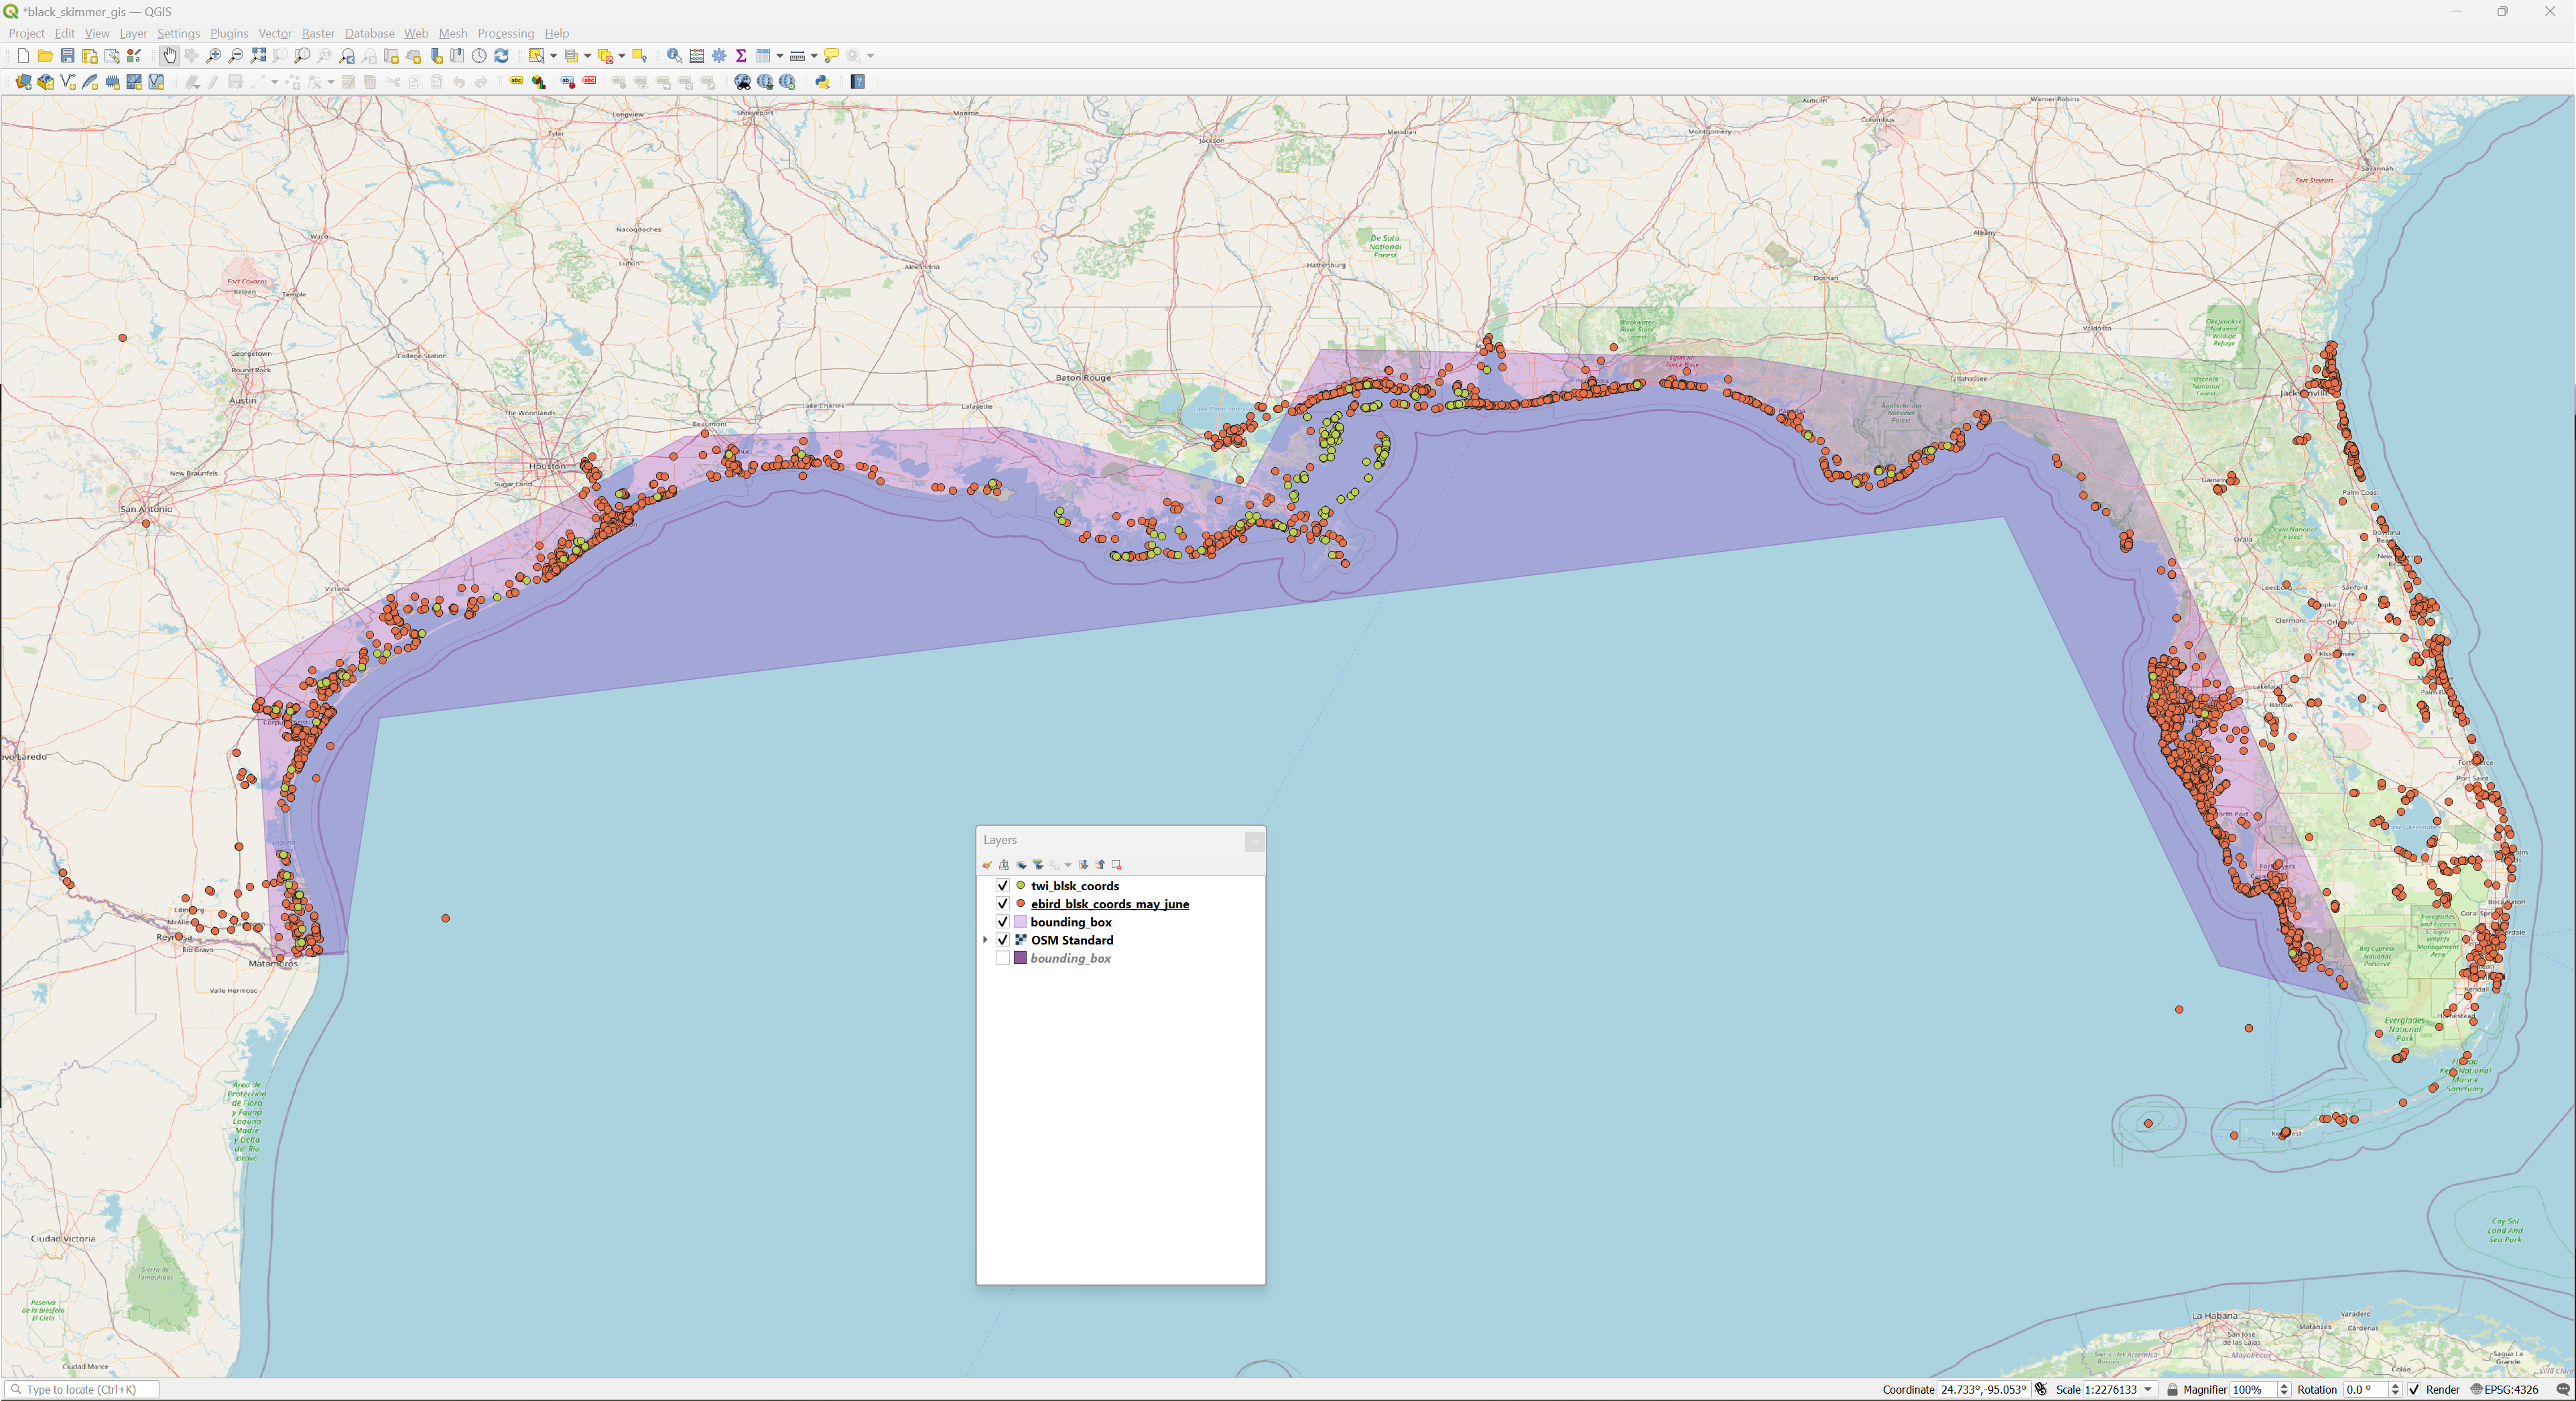

In [40]:
Image(filename='Screenshot 2023-12-22 065914.png')

In the image above I have plotted data from The Water Institute Survey in green.  The eBird Black Skimmer Sightings in May and June are plotted in red.  The bounding box is where I will reduce my datasets from eBird.  We're leaving out SE and E Florida and we're leaving out some of the larger cities, like Houston and New Orleans.

In [41]:
# From QGIS I exported the bounding box as a geojson file and now I will import this file and convert it into a GeoPandas MultiPolygon
bounding_box_geojson_filepath = 'data_files/qgis_files/bounding_box.geojson'
bounding_box_gdf = gpd.read_file(bounding_box_geojson_filepath, crs='EPSG:4326') # importing the file and setting the CRS

In [42]:
# converting the ebird sampling data into a GeoPandas DataFrame and creating the geometry column
ebird_sampling_may_june_gdf = gpd.GeoDataFrame(ebird_sampling_may_june_df, geometry=gpd.points_from_xy(ebird_sampling_may_june_df.lon, ebird_sampling_may_june_df.lat), crs='EPSG:4326')

In [43]:
ebird_sampling_may_june_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1224939 entries, 3 to 8456483
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   state          1224939 non-null  object        
 1   county         1224918 non-null  object        
 2   locality_name  1224939 non-null  object        
 3   locality_id    1224939 non-null  object        
 4   lat            1224939 non-null  float64       
 5   lon            1224939 non-null  float64       
 6   date           1224939 non-null  datetime64[ns]
 7   checklist_id   1224939 non-null  object        
 8   gui            1224939 non-null  object        
 9   geometry       1224939 non-null  geometry      
dtypes: datetime64[ns](1), float64(2), geometry(1), object(6)
memory usage: 102.8+ MB


In [44]:
# Creating a MultiPolygon variable to use to filter the sampling dataset
bounding_box = bounding_box_gdf.geometry.iloc[0]

In [45]:
print(bounding_box)

MULTIPOLYGON (((-96.95948593696251 25.94725923106909, -97.46094969687086 25.94101543039936, -97.5628154390877 27.20409555567851, -97.3200187865998 27.56885517778824, -97.63283121794467 27.79894735427387, -97.6322665745668 27.96834036763753, -97.35841453629556 27.95648285670208, -97.21273654480282 28.22468846119453, -97.05604800744143 28.2616726024456, -96.70822768666807 28.48018958968472, -96.70596911315656 28.70491765408049, -96.41037830483698 28.8195402597899, -96.01512794032179 28.70943480110353, -95.10802835375944 29.38870078469179, -95.16731590843671 29.53155555929514, -94.74242176658288 29.74979022484531, -94.25456988809556 29.93273467927806, -92.89914345949741 29.85340228468608, -92.11767702451309 29.61851063948848, -91.75912847956002 29.66255282296303, -91.47934768582105 29.43076671634377, -89.91921031570533 29.58642114349411, -89.56441325086483 30.21836899423245, -88.81058114475471 30.52623656025726, -86.22901123661464 30.58856796268434, -85.96927528279038 30.42736227829994, -

In [46]:
# creating a new filtered gdf of the sampling data using the bounding box to filter
filtered_ebird_sampling_gdf = ebird_sampling_may_june_gdf[ebird_sampling_may_june_gdf.geometry.within(bounding_box)].copy()

In [47]:
filtered_ebird_sampling_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 235211 entries, 189 to 8456447
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   state          235211 non-null  object        
 1   county         235211 non-null  object        
 2   locality_name  235211 non-null  object        
 3   locality_id    235211 non-null  object        
 4   lat            235211 non-null  float64       
 5   lon            235211 non-null  float64       
 6   date           235211 non-null  datetime64[ns]
 7   checklist_id   235211 non-null  object        
 8   gui            235211 non-null  object        
 9   geometry       235211 non-null  geometry      
dtypes: datetime64[ns](1), float64(2), geometry(1), object(6)
memory usage: 19.7+ MB


In [48]:
# converting the ebird database to a geopandas dataframe and adding the lat lon points
ebird_blsk_may_june_gdf = gpd.GeoDataFrame(ebird_blsk_may_june_df, geometry=gpd.points_from_xy(ebird_blsk_may_june_df.lon, ebird_blsk_may_june_df.lat), crs='EPSG:4326').copy()

In [49]:
ebird_blsk_may_june_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 28676 entries, 3 to 202674
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   gui            28676 non-null  object        
 1   count          27121 non-null  float64       
 2   breeding_code  619 non-null    object        
 3   breeding_cat   619 non-null    object        
 4   age_sex        109 non-null    object        
 5   state          28676 non-null  object        
 6   county         28676 non-null  object        
 7   locality_name  28676 non-null  object        
 8   locality_id    28676 non-null  object        
 9   locality_type  28676 non-null  object        
 10  lat            28676 non-null  float64       
 11  lon            28676 non-null  float64       
 12  date           28676 non-null  datetime64[ns]
 13  checklist_id   28676 non-null  object        
 14  presence       28676 non-null  int64         
 15  geometry       

In [50]:
# converting twi dataset to geopandas dataframe

twi_blsk_gdf = gpd.GeoDataFrame(twi_blsk_df ,geometry=gpd.points_from_xy(twi_blsk_df.lon, twi_blsk_df.lat), crs='EPSG:4326').copy()
twi_no_blsk_gdf = gpd.GeoDataFrame(twi_no_blsk_df ,geometry=gpd.points_from_xy(twi_no_blsk_df.lon, twi_no_blsk_df.lat), crs='EPSG:4326').copy()

In [51]:
twi_blsk_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1914 entries, 1173 to 49142
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1914 non-null   datetime64[ns]
 1   ColonyName             1914 non-null   object        
 2   ChickNestwithoutAdult  1913 non-null   float64       
 3   AbandNest              1914 non-null   float64       
 4   EmptyNest              1914 non-null   float64       
 5   Brood                  1914 non-null   float64       
 6   Chicks/Nestlings       272 non-null    float64       
 7   RoostingBirds          998 non-null    float64       
 8   RoostingAdults         998 non-null    float64       
 9   RoostingImmatures      998 non-null    float64       
 10  UnknownAge             998 non-null    float64       
 11  ColonyID               1914 non-null   object        
 12  state                  1914 non-null   object        
 

In [52]:
filtered_ebird_blsk_may_june_gdf = ebird_blsk_may_june_gdf[ebird_blsk_may_june_gdf.geometry.within(bounding_box)].copy()

In [53]:
point_counts_ebird_blsk = filtered_ebird_blsk_may_june_gdf.groupby(['lat','lon']).size().sort_values(ascending=False).reset_index(name='count')
point_counts_ebird_blsk.to_csv('data_files/qgis_files/point_counts_ebird_blsk.csv')

In [54]:
point_counts_ebird_sampling = filtered_ebird_sampling_gdf.groupby(['lat','lon']).size().sort_values(ascending=False).reset_index(name='count')
point_counts_ebird_sampling.to_csv('data_files/qgis_files/point_counts_ebird_sampling.csv')

In [55]:
point_counts_twi = twi_blsk_gdf.groupby(['lat','lon']).size().sort_values(ascending=False).reset_index(name='count')
point_counts_twi.to_csv('data_files/qgis_files/point_counts_twi.csv')

In [56]:
filtered_ebird_sampling_gdf[['lon', 'lat']].to_csv('data_files/qgis_files/sampling_coords.csv')
filtered_ebird_blsk_may_june_gdf[['lon', 'lat']].to_csv('data_files/qgis_files/filtered_ebird_blsk_may_june_coords.csv')
twi_no_blsk_gdf[['lon', 'lat']].to_csv('data_files/qgis_files/twi_no_blsk_coords.csv')

### Presence / Absence analysis

The goal in this section is to look for patterns in the presence or absence of Black Skimmers within our area of interest. Some of the questions are:
* Are there in person observations that match the arial photographs?
* Are there submitted checklists submitted in areas where the bird should be expected but it is not being observed?
* What changes in presence and absence are there over different years?

In [57]:
# dropping rows from the sampling data that contained values in checklist id that are present in the ebird observation data.
# this action leaves only observations that did NOT see black skimmers during that birding effort
filtered_ebird_sampling_gdf.drop(filtered_ebird_sampling_gdf[filtered_ebird_sampling_gdf['checklist_id'].isin(ebird_blsk_may_june_gdf['checklist_id'])].index, inplace=True)

filtered_ebird_sampling_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 211975 entries, 189 to 8456410
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   state          211975 non-null  object        
 1   county         211975 non-null  object        
 2   locality_name  211975 non-null  object        
 3   locality_id    211975 non-null  object        
 4   lat            211975 non-null  float64       
 5   lon            211975 non-null  float64       
 6   date           211975 non-null  datetime64[ns]
 7   checklist_id   211975 non-null  object        
 8   gui            211975 non-null  object        
 9   geometry       211975 non-null  geometry      
dtypes: datetime64[ns](1), float64(2), geometry(1), object(6)
memory usage: 17.8+ MB


In [58]:
# add a no presence column to the sampling data now that we've removed all checklists id's that had observations of Black Skimmers

filtered_ebird_sampling_gdf['presence'] = 0

filtered_ebird_sampling_gdf.head()

state   county              locality_name locality_id        lat  \
189    AL   Mobile              DeSoto Avenue   L12007144  30.257582   
386    AL  Baldwin  Blackwater River South FW   L12150569  30.454365   
622    AL  Baldwin           Plantation Pines   L12373398  30.546181   
625    AL  Baldwin           Plantation Pines   L12373398  30.546181   
638    AL  Baldwin           Plantation Pines   L12373398  30.546181   

           lon       date checklist_id                               gui  \
189 -88.117842 2022-05-31   S114278937   obs203457:S114278937:2022-05-31   
386 -87.479564 2022-05-06   S109093809   obs228192:S109093809:2022-05-06   
622 -87.850936 2022-05-07   S109336965  obs1115980:S109336965:2022-05-07   
625 -87.850936 2022-05-10   S109712930  obs1115980:S109712930:2022-05-10   
638 -87.850936 2022-06-26   S113824153  obs1115980:S113824153:2022-06-26   

                       geometry  presence  
189  POINT (-88.11784 30.25758)         0  
386  POINT (-87.47956 30.45436)         0  
622  POINT (-87.85094 30.54618)         0  
625  POINT (-87.85094 30.54618)         0  
638  POINT (-87.85094 30.54618)         0

In [59]:
pres_abs_ebird_sampling_gdf = filtered_ebird_sampling_gdf[['state', 'lat', 'lon', 'date', 'gui', 'geometry', 'presence']].copy()
pres_abs_ebird_sampling_gdf['table_name'] = 'ebird_sampling'
pres_abs_ebird_sampling_gdf['count'] = np.nan
pres_abs_ebird_sampling_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 211975 entries, 189 to 8456410
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   state       211975 non-null  object        
 1   lat         211975 non-null  float64       
 2   lon         211975 non-null  float64       
 3   date        211975 non-null  datetime64[ns]
 4   gui         211975 non-null  object        
 5   geometry    211975 non-null  geometry      
 6   presence    211975 non-null  int64         
 7   table_name  211975 non-null  object        
 8   count       0 non-null       float64       
dtypes: datetime64[ns](1), float64(3), geometry(1), int64(1), object(3)
memory usage: 16.2+ MB


In [60]:
pres_abs_ebird_obs_gdf = filtered_ebird_blsk_may_june_gdf[['state', 'lat', 'lon', 'date', 'gui', 'geometry', 'presence', 'count']].copy()
pres_abs_ebird_obs_gdf['table_name'] = 'ebird_obs'
pres_abs_ebird_obs_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 23245 entries, 3 to 202665
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   state       23245 non-null  object        
 1   lat         23245 non-null  float64       
 2   lon         23245 non-null  float64       
 3   date        23245 non-null  datetime64[ns]
 4   gui         23245 non-null  object        
 5   geometry    23245 non-null  geometry      
 6   presence    23245 non-null  int64         
 7   count       21905 non-null  float64       
 8   table_name  23245 non-null  object        
dtypes: datetime64[ns](1), float64(3), geometry(1), int64(1), object(3)
memory usage: 1.8+ MB


In [61]:
# checking for duplicates.  I've identified a potential situation where two or more individuals submit a checklist
# for the same birding effort.
pres_abs_ebird_obs_gdf.sort_values(by='count', ascending=False).head(10)

state        lat        lon       date  \
145049    TX  28.949499 -95.318799 2015-06-27   
128865    LA  29.044915 -90.824318 2010-05-20   
128866    LA  29.043564 -90.823975 2010-05-20   
144485    TX  28.973155 -95.340385 2011-06-25   
129016    LA  29.062472 -90.950661 2015-05-11   
127987    LA  29.312000 -89.562000 2014-06-16   
127997    LA  29.312000 -89.562000 2014-06-16   
119875    FL  27.831638 -82.434626 2022-06-14   
119874    FL  27.831638 -82.434626 2022-06-14   
144812    TX  28.949499 -95.318799 2013-06-29   

                                                    gui  \
145049   URN:CornellLabOfOrnithology:EBIRD:OBS329915823   
128865    URN:CornellLabOfOrnithology:EBIRD:OBS92791744   
128866    URN:CornellLabOfOrnithology:EBIRD:OBS92750413   
144485   URN:CornellLabOfOrnithology:EBIRD:OBS121764823   
129016   URN:CornellLabOfOrnithology:EBIRD:OBS620919146   
127987   URN:CornellLabOfOrnithology:EBIRD:OBS324454705   
127997   URN:CornellLabOfOrnithology:EBIRD:OBS260644724   
119875  URN:CornellLabOfOrnithology:EBIRD:OBS1459306154   
119874  URN:CornellLabOfOrnithology:EBIRD:OBS1459340525   
144812   URN:CornellLabOfOrnithology:EBIRD:OBS203026736   

                          geometry  presence   count table_name  
145049  POINT (-95.31880 28.94950)         1  2000.0  ebird_obs  
128865  POINT (-90.82432 29.04491)         1  1960.0  ebird_obs  
128866  POINT (-90.82397 29.04356)         1  1960.0  ebird_obs  
144485  POINT (-95.34039 28.97315)         1  1700.0  ebird_obs  
129016  POINT (-90.95066 29.06247)         1  1670.0  ebird_obs  
127987  POINT (-89.56200 29.31200)         1  1614.0  ebird_obs  
127997  POINT (-89.56200 29.31200)         1  1614.0  ebird_obs  
119875  POINT (-82.43463 27.83164)         1  1523.0  ebird_obs  
119874  POINT (-82.43463 27.83164)         1  1523.0  ebird_obs  
144812  POINT (-95.31880 28.94950)         1  1500.0  ebird_obs

In [62]:
# As can be seen above rows 119875, 119874 are identical but submitted by two different individuals
# This can be deducted because Ebird uses the observation id as part of the GUI/URN. Lets remove these duplicates
pres_abs_ebird_obs_gdf.drop_duplicates(subset=['date', 'geometry', 'count'], keep='first', inplace=True)
pres_abs_ebird_obs_gdf.sort_values(by='count', ascending=False).head(10)

state        lat        lon       date  \
145049    TX  28.949499 -95.318799 2015-06-27   
128865    LA  29.044915 -90.824318 2010-05-20   
128866    LA  29.043564 -90.823975 2010-05-20   
144485    TX  28.973155 -95.340385 2011-06-25   
129016    LA  29.062472 -90.950661 2015-05-11   
127987    LA  29.312000 -89.562000 2014-06-16   
119874    FL  27.831638 -82.434626 2022-06-14   
144961    TX  28.949499 -95.318799 2014-06-28   
144812    TX  28.949499 -95.318799 2013-06-29   
110554    FL  27.299505 -82.566544 2023-06-30   

                                                    gui  \
145049   URN:CornellLabOfOrnithology:EBIRD:OBS329915823   
128865    URN:CornellLabOfOrnithology:EBIRD:OBS92791744   
128866    URN:CornellLabOfOrnithology:EBIRD:OBS92750413   
144485   URN:CornellLabOfOrnithology:EBIRD:OBS121764823   
129016   URN:CornellLabOfOrnithology:EBIRD:OBS620919146   
127987   URN:CornellLabOfOrnithology:EBIRD:OBS324454705   
119874  URN:CornellLabOfOrnithology:EBIRD:OBS1459340525   
144961   URN:CornellLabOfOrnithology:EBIRD:OBS261577967   
144812   URN:CornellLabOfOrnithology:EBIRD:OBS203026736   
110554  URN:CornellLabOfOrnithology:EBIRD:OBS1772352093   

                          geometry  presence   count table_name  
145049  POINT (-95.31880 28.94950)         1  2000.0  ebird_obs  
128865  POINT (-90.82432 29.04491)         1  1960.0  ebird_obs  
128866  POINT (-90.82397 29.04356)         1  1960.0  ebird_obs  
144485  POINT (-95.34039 28.97315)         1  1700.0  ebird_obs  
129016  POINT (-90.95066 29.06247)         1  1670.0  ebird_obs  
127987  POINT (-89.56200 29.31200)         1  1614.0  ebird_obs  
119874  POINT (-82.43463 27.83164)         1  1523.0  ebird_obs  
144961  POINT (-95.31880 28.94950)         1  1500.0  ebird_obs  
144812  POINT (-95.31880 28.94950)         1  1500.0  ebird_obs  
110554  POINT (-82.56654 27.29950)         1  1500.0  ebird_obs

In [63]:
# I'm also seeing potential duplicate records where the count is the same and the same date where the location is not identical but within a few hundred meters.
ebird_pos_dubs = pres_abs_ebird_obs_gdf[pres_abs_ebird_obs_gdf.duplicated(subset=['state','date', 'count'], keep=False)]
ebird_pos_dubs.sort_values(by=['count', 'date'], ascending=[False, True]).head(10)

state        lat        lon       date  \
128865    LA  29.044915 -90.824318 2010-05-20   
128866    LA  29.043564 -90.823975 2010-05-20   
128867    LA  29.046866 -90.824318 2010-05-20   
128868    LA  29.043564 -90.823975 2010-05-20   
124495    LA  29.260000 -89.950000 2015-05-17   
124500    LA  29.260943 -89.952450 2015-05-17   
106161    FL  27.316341 -82.581433 2020-05-24   
106173    FL  27.311689 -82.577383 2020-05-24   
124789    LA  29.260000 -89.950000 2016-05-18   
124806    LA  29.260943 -89.952450 2016-05-18   

                                                   gui  \
128865   URN:CornellLabOfOrnithology:EBIRD:OBS92791744   
128866   URN:CornellLabOfOrnithology:EBIRD:OBS92750413   
128867   URN:CornellLabOfOrnithology:EBIRD:OBS92640959   
128868   URN:CornellLabOfOrnithology:EBIRD:OBS92686354   
124495  URN:CornellLabOfOrnithology:EBIRD:OBS323266848   
124500  URN:CornellLabOfOrnithology:EBIRD:OBS322235641   
106161  URN:CornellLabOfOrnithology:EBIRD:OBS930486552   
106173  URN:CornellLabOfOrnithology:EBIRD:OBS930689671   
124789  URN:CornellLabOfOrnithology:EBIRD:OBS406244718   
124806  URN:CornellLabOfOrnithology:EBIRD:OBS406233676   

                          geometry  presence   count table_name  
128865  POINT (-90.82432 29.04491)         1  1960.0  ebird_obs  
128866  POINT (-90.82397 29.04356)         1  1960.0  ebird_obs  
128867  POINT (-90.82432 29.04687)         1  1355.0  ebird_obs  
128868  POINT (-90.82397 29.04356)         1  1355.0  ebird_obs  
124495  POINT (-89.95000 29.26000)         1   980.0  ebird_obs  
124500  POINT (-89.95245 29.26094)         1   980.0  ebird_obs  
106161  POINT (-82.58143 27.31634)         1   600.0  ebird_obs  
106173  POINT (-82.57738 27.31169)         1   600.0  ebird_obs  
124789  POINT (-89.95000 29.26000)         1   575.0  ebird_obs  
124806  POINT (-89.95245 29.26094)         1   575.0  ebird_obs

In [64]:
# checking to see how close/far the suspected duplicates are from each other in meters
point1 = ebird_pos_dubs.loc[128868, 'geometry']
point2 = ebird_pos_dubs.loc[128867, 'geometry']
distance = point1.distance(point2)
distance_in_meters = distance * 111320
print(f"The distance is approximately {distance_in_meters} meters.")


The distance is approximately 369.51562627722546 meters.


In [65]:
# there are duplicates where the date, count are the same and the geometry is very similar.
# lets find the rows where the date and count are the same and the geometries are within 500 meters of each other.

pres_abs_ebird_obs_projected = pres_abs_ebird_obs_gdf.to_crs('EPSG:3857') # Changing to a Mercator map projection which will better represent distance

pres_abs_ebird_obs_projected['buffer'] = pres_abs_ebird_obs_projected.geometry.buffer(500) # setting a buffer column of 500 meters
pres_abs_ebird_obs_projected.set_geometry('buffer', inplace=True)

In [66]:
# Perform a spatial join on the buffered geometries
spatial_join = gpd.sjoin(pres_abs_ebird_obs_projected, pres_abs_ebird_obs_projected, how='inner', predicate='intersects')




In [67]:
spatial_join.sort_values(by='count_left', ascending=False) # checking the join.

state_left   lat_left   lon_left  date_left  \
145049         TX  28.949499 -95.318799 2015-06-27   
145049         TX  28.949499 -95.318799 2015-06-27   
145049         TX  28.949499 -95.318799 2015-06-27   
145049         TX  28.949499 -95.318799 2015-06-27   
145049         TX  28.949499 -95.318799 2015-06-27   
...           ...        ...        ...        ...   
199927         TX  27.855296 -97.130904 2013-05-01   
201702         TX  26.418623 -97.388434 2016-05-27   
201704         TX  26.516705 -97.454362 2016-06-27   
201780         TX  26.564613 -97.400294 2022-05-17   
201780         TX  26.564613 -97.400294 2022-05-17   

                                               gui_left  \
145049   URN:CornellLabOfOrnithology:EBIRD:OBS329915823   
145049   URN:CornellLabOfOrnithology:EBIRD:OBS329915823   
145049   URN:CornellLabOfOrnithology:EBIRD:OBS329915823   
145049   URN:CornellLabOfOrnithology:EBIRD:OBS329915823   
145049   URN:CornellLabOfOrnithology:EBIRD:OBS329915823   
...                                                 ...   
199927   URN:CornellLabOfOrnithology:EBIRD:OBS193920498   
201702   URN:CornellLabOfOrnithology:EBIRD:OBS407598204   
201704  URN:CornellLabOfOrnithology:EBIRD:OBS1316362176   
201780  URN:CornellLabOfOrnithology:EBIRD:OBS1546138157   
201780  URN:CornellLabOfOrnithology:EBIRD:OBS1546138157   

                            geometry_left  presence_left  count_left  \
145049  POINT (-10610840.168 3369219.996)              1      2000.0   
145049  POINT (-10610840.168 3369219.996)              1      2000.0   
145049  POINT (-10610840.168 3369219.996)              1      2000.0   
145049  POINT (-10610840.168 3369219.996)              1      2000.0   
145049  POINT (-10610840.168 3369219.996)              1      2000.0   
...                                   ...            ...         ...   
199927  POINT (-10812562.762 3230742.145)              1         NaN   
201702  POINT (-10841230.927 3051022.197)              1         NaN   
201704  POINT (-10848569.920 3063219.049)              1         NaN   
201780  POINT (-10842551.142 3069180.362)              1         NaN   
201780  POINT (-10842551.142 3069180.362)              1         NaN   

       table_name_left                                             buffer  \
145049       ebird_obs  POLYGON ((-10610340.168 3369219.996, -10610342...   
145049       ebird_obs  POLYGON ((-10610340.168 3369219.996, -10610342...   
145049       ebird_obs  POLYGON ((-10610340.168 3369219.996, -10610342...   
145049       ebird_obs  POLYGON ((-10610340.168 3369219.996, -10610342...   
145049       ebird_obs  POLYGON ((-10610340.168 3369219.996, -10610342...   
...                ...                                                ...   
199927       ebird_obs  POLYGON ((-10812062.762 3230742.145, -10812065...   
201702       ebird_obs  POLYGON ((-10840730.927 3051022.197, -10840733...   
201704       ebird_obs  POLYGON ((-10848069.920 3063219.049, -10848072...   
201780       ebird_obs  POLYGON ((-10842051.142 3069180.362, -10842053...   
201780       ebird_obs  POLYGON ((-10842051.142 3069180.362, -10842053...   

        index_right state_right  lat_right  lon_right date_right  \
145049       145211          TX  28.949767 -95.319040 2017-05-25   
145049       145049          TX  28.949499 -95.318799 2015-06-27   
145049       145415          TX  28.949767 -95.319040 2019-06-21   
145049       144962          TX  28.949767 -95.319040 2014-06-04   
145049       144812          TX  28.949499 -95.318799 2013-06-29   
...             ...         ...        ...        ...        ...   
199927       199927          TX  27.855296 -97.130904 2013-05-01   
201702       201702          TX  26.418623 -97.388434 2016-05-27   
201704       201704          TX  26.516705 -97.454362 2016-06-27   
201780       201810          TX  26.564097 -97.400675 2023-05-23   
201780       201780          TX  26.564613 -97.400294 2022-05-17   

                                          

In [68]:
# dropping the NaN values as these won't figure into the average count per checklist calculation

spatial_join.dropna(subset=['count_left'], inplace=True)
spatial_join.dropna(subset=['count_right'], inplace=True)
spatial_join.sort_values(by='count_left', ascending=False) # checking the join.

state_left   lat_left   lon_left  date_left  \
145049         TX  28.949499 -95.318799 2015-06-27   
145049         TX  28.949499 -95.318799 2015-06-27   
145049         TX  28.949499 -95.318799 2015-06-27   
145049         TX  28.949499 -95.318799 2015-06-27   
145049         TX  28.949499 -95.318799 2015-06-27   
...           ...        ...        ...        ...   
76240          FL  27.749557 -82.747607 2015-06-07   
76264          FL  27.749557 -82.747607 2015-06-12   
76277          FL  27.749557 -82.747607 2015-06-25   
161692         TX  26.140091 -97.174823 2021-06-05   
101093         FL  27.325319 -82.433682 2016-06-04   

                                               gui_left  \
145049   URN:CornellLabOfOrnithology:EBIRD:OBS329915823   
145049   URN:CornellLabOfOrnithology:EBIRD:OBS329915823   
145049   URN:CornellLabOfOrnithology:EBIRD:OBS329915823   
145049   URN:CornellLabOfOrnithology:EBIRD:OBS329915823   
145049   URN:CornellLabOfOrnithology:EBIRD:OBS329915823   
...                                                 ...   
76240    URN:CornellLabOfOrnithology:EBIRD:OBS325713166   
76264    URN:CornellLabOfOrnithology:EBIRD:OBS326524230   
76277    URN:CornellLabOfOrnithology:EBIRD:OBS328877971   
161692  URN:CornellLabOfOrnithology:EBIRD:OBS1175889001   
101093   URN:CornellLabOfOrnithology:EBIRD:OBS409623068   

                            geometry_left  presence_left  count_left  \
145049  POINT (-10610840.168 3369219.996)              1      2000.0   
145049  POINT (-10610840.168 3369219.996)              1      2000.0   
145049  POINT (-10610840.168 3369219.996)              1      2000.0   
145049  POINT (-10610840.168 3369219.996)              1      2000.0   
145049  POINT (-10610840.168 3369219.996)              1      2000.0   
...                                   ...            ...         ...   
76240    POINT (-9211421.498 3217435.167)              1         1.0   
76264    POINT (-9211421.498 3217435.167)              1         1.0   
76277    POINT (-9211421.498 3217435.167)              1         1.0   
161692  POINT (-10817451.848 3016442.210)              1         1.0   
101093   POINT (-9176475.516 3164175.134)              1         1.0   

       table_name_left                                             buffer  \
145049       ebird_obs  POLYGON ((-10610340.168 3369219.996, -10610342...   
145049       ebird_obs  POLYGON ((-10610340.168 3369219.996, -10610342...   
145049       ebird_obs  POLYGON ((-10610340.168 3369219.996, -10610342...   
145049       ebird_obs  POLYGON ((-10610340.168 3369219.996, -10610342...   
145049       ebird_obs  POLYGON ((-10610340.168 3369219.996, -10610342...   
...                ...                                                ...   
76240        ebird_obs  POLYGON ((-9210921.498 3217435.167, -9210923.9...   
76264        ebird_obs  POLYGON ((-9210921.498 3217435.167, -9210923.9...   
76277        ebird_obs  POLYGON ((-9210921.498 3217435.167, -9210923.9...   
161692       ebird_obs  POLYGON ((-10816951.848 3016442.210, -10816954...   
101093       ebird_obs  POLYGON ((-9175975.516 3164175.134, -9175977.9...   

        index_right state_right  lat_right  lon_right date_right  \
145049       145211          TX  28.949767 -95.319040 2017-05-25   
145049       144963          TX  28.949053 -95.320473 2014-06-28   
145049       145408          TX  28.949767 -95.319040 2019-05-17   
145049       144961          TX  28.949499 -95.318799 2014-06-28   
145049       145049          TX  28.949499 -95.318799 2015-06-27   
...             ...         ...        ...        ...        ...   
76240         86687          FL  27.749557 -82.747607 2021-05-10   
76264         86687          FL  27.749557 -82.747607 2021-05-10   
76277         86687          FL  27.749557 -82.747607 2021-05-10   
161692       165114          TX  26.140091 -97.174823 2022-05-14   
101093       100266          FL  27.325319 -82.433682 2014-05-12   

                                          

In [69]:
# This operation will find where the left and right dates are the same, the counts are the same and exclude rows where the index number is the same

duplicates_within_500m = spatial_join[(spatial_join['date_left'] == spatial_join['date_right']) & 
                                      (spatial_join['count_left'] == spatial_join['count_right']) &
                                      (spatial_join.index != spatial_join.index_right)].copy()

duplicates_within_500m.sort_values(by='date_left', ascending=True)

state_left   lat_left   lon_left  date_left  \
128865         LA  29.044915 -90.824318 2010-05-20   
128868         LA  29.043564 -90.823975 2010-05-20   
128866         LA  29.043564 -90.823975 2010-05-20   
128867         LA  29.046866 -90.824318 2010-05-20   
144576         TX  28.934113 -95.309676 2012-05-11   
...           ...        ...        ...        ...   
118710         FL  30.125712 -84.143686 2023-06-16   
187928         TX  29.368137 -94.747442 2023-06-17   
187895         TX  29.370975 -94.750321 2023-06-17   
187930         TX  29.238833 -94.891496 2023-06-19   
187966         TX  29.236537 -94.895768 2023-06-19   

                                               gui_left  \
128865    URN:CornellLabOfOrnithology:EBIRD:OBS92791744   
128868    URN:CornellLabOfOrnithology:EBIRD:OBS92686354   
128866    URN:CornellLabOfOrnithology:EBIRD:OBS92750413   
128867    URN:CornellLabOfOrnithology:EBIRD:OBS92640959   
144576   URN:CornellLabOfOrnithology:EBIRD:OBS152380241   
...                                                 ...   
118710  URN:CornellLabOfOrnithology:EBIRD:OBS1761060325   
187928  URN:CornellLabOfOrnithology:EBIRD:OBS1762094784   
187895  URN:CornellLabOfOrnithology:EBIRD:OBS1762365391   
187930  URN:CornellLabOfOrnithology:EBIRD:OBS1763830309   
187966  URN:CornellLabOfOrnithology:EBIRD:OBS1763649418   

                            geometry_left  presence_left  count_left  \
128865  POINT (-10110516.820 3381363.926)              1      1960.0   
128868  POINT (-10110478.604 3381191.951)              1      1355.0   
128866  POINT (-10110478.604 3381191.951)              1      1960.0   
128867  POINT (-10110516.820 3381612.354)              1      1355.0   
144576  POINT (-10609824.578 3367262.753)              1         4.0   
...                                   ...            ...         ...   
118710   POINT (-9366832.312 3519719.244)              1         2.0   
187928  POINT (-10547236.986 3422585.652)              1        50.0   
187895  POINT (-10547557.475 3422948.067)              1        50.0   
187930  POINT (-10563273.026 3406079.322)              1         1.0   
187966  POINT (-10563748.606 3405786.442)              1         1.0   

       table_name_left                                             buffer  \
128865       ebird_obs  POLYGON ((-10110016.820 3381363.926, -10110019...   
128868       ebird_obs  POLYGON ((-10109978.604 3381191.951, -10109981...   
128866       ebird_obs  POLYGON ((-10109978.604 3381191.951, -10109981...   
128867       ebird_obs  POLYGON ((-10110016.820 3381612.354, -10110019...   
144576       ebird_obs  POLYGON ((-10609324.578 3367262.753, -10609326...   
...                ...                                                ...   
118710       ebird_obs  POLYGON ((-9366332.312 3519719.244, -9366334.7...   
187928       ebird_obs  POLYGON ((-10546736.986 3422585.652, -10546739...   
187895       ebird_obs  POLYGON ((-10547057.475 3422948.067, -10547059...   
187930       ebird_obs  POLYGON ((-10562773.026 3406079.322, -10562775...   
187966       ebird_obs  POLYGON ((-10563248.606 3405786.442, -10563251...   

        index_right state_right  lat_right  lon_right date_right  \
128865       128866          LA  29.043564 -90.823975 2010-05-20   
128868       128867          LA  29.046866 -90.824318 2010-05-20   
128866       128865          LA  29.044915 -90.824318 2010-05-20   
128867       128868          LA  29.043564 -90.823975 2010-05-20   
144576       144584          TX  28.933623 -95.308725 2012-05-11   
...             ...         ...        ...        ...        ...   
118710       118735          FL  30.129600 -84.144653 2023-06-16   
187928       187895          TX  29.370975 -94.750321 2023-06-17   
187895       187928          TX  29.368137 -94.747442 2023-06-17   
187930       187966          TX  29.236537 -94.895768 2023-06-19   
187966       187930          TX  29.238833 -94.891496 2023-06-19   

                                          

In [70]:
# getting rid of right side now that we have our list of duplicates
duplicates_within_500m.drop(columns=['index_right', 'state_right', 'lat_right', 'lon_right', 'date_right', 'gui_right', 'geometry_right', 'presence_right', 'count_right', 'table_name_right'], inplace=True)

In [71]:
# Dropping the duplicate counts and keeping the first record.  We will be left with unique records without duplicate counts in the same place on the same dat
duplicates_to_drop = duplicates_within_500m.drop_duplicates(subset=['date_left', 'state_left', 'count_left'], keep='last') # using last to create a dataframe of duplicates to use as a filter
duplicates_to_drop.sort_values(by='count_left', ascending=False)

state_left   lat_left   lon_left  date_left  \
128866         LA  29.043564 -90.823975 2010-05-20   
128868         LA  29.043564 -90.823975 2010-05-20   
124495         LA  29.260000 -89.950000 2015-05-17   
106173         FL  27.311689 -82.577383 2020-05-24   
124789         LA  29.260000 -89.950000 2016-05-18   
...           ...        ...        ...        ...   
137618         MS  30.500325 -88.798204 2016-06-09   
84251          FL  27.876008 -82.682924 2020-05-23   
168204         TX  26.137463 -97.173937 2023-05-06   
137608         MS  30.500325 -88.798204 2016-05-26   
196260         TX  27.648540 -97.326023 2020-05-06   

                                               gui_left  \
128866    URN:CornellLabOfOrnithology:EBIRD:OBS92750413   
128868    URN:CornellLabOfOrnithology:EBIRD:OBS92686354   
124495   URN:CornellLabOfOrnithology:EBIRD:OBS323266848   
106173   URN:CornellLabOfOrnithology:EBIRD:OBS930689671   
124789   URN:CornellLabOfOrnithology:EBIRD:OBS406244718   
...                                                 ...   
137618   URN:CornellLabOfOrnithology:EBIRD:OBS411100191   
84251    URN:CornellLabOfOrnithology:EBIRD:OBS929710454   
168204  URN:CornellLabOfOrnithology:EBIRD:OBS1711436120   
137608   URN:CornellLabOfOrnithology:EBIRD:OBS407532140   
196260   URN:CornellLabOfOrnithology:EBIRD:OBS913299510   

                            geometry_left  presence_left  count_left  \
128866  POINT (-10110478.604 3381191.951)              1      1960.0   
128868  POINT (-10110478.604 3381191.951)              1      1355.0   
124495  POINT (-10013188.197 3408780.012)              1       980.0   
106173   POINT (-9192472.282 3162467.395)              1       600.0   
124789  POINT (-10013188.197 3408780.012)              1       575.0   
...                                   ...            ...         ...   
137618   POINT (-9884970.830 3568025.445)              1         1.0   
84251    POINT (-9204220.975 3233350.172)              1         1.0   
168204  POINT (-10817353.152 3016116.285)              1         1.0   
137608   POINT (-9884970.830 3568025.445)              1         1.0   
196260  POINT (-10834283.366 3204734.540)              1         1.0   

       table_name_left                                             buffer  
128866       ebird_obs  POLYGON ((-10109978.604 3381191.951, -10109981...  
128868       ebird_obs  POLYGON ((-10109978.604 3381191.951, -10109981...  
124495       ebird_obs  POLYGON ((-10012688.197 3408780.012, -10012690...  
106173       ebird_obs  POLYGON ((-9191972.282 3162467.395, -9191974.6...  
124789       ebird_obs  POLYGON ((-10012688.197 3408780.012, -10012690...  
...                ...                                                ...  
137618       ebird_obs  POLYGON ((-9884470.830 3568025.445, -9884473.2...  
84251        ebird_obs  POLYGON ((-9203720.975 3233350.172, -9203723.3...  
168204       ebird_obs  POLYGON ((-10816853.152 3016116.285, -10816855...  
137608       ebird_obs  POLYGON ((-9884470.830 3568025.445, -9884473.2...  
196260       ebird_obs  POLYGON ((-10833783.366 3204734.540, -10833785...  

[187 rows x 10 columns]

In [72]:
# using the duplicates to drop to remove the data that we know is duplicated from the main ebird observation dataframe

duplicate_GUIs = duplicates_to_drop['gui_left'].tolist()  # putting all of the GUIs into a list to use as a filter

pres_abs_ebird_obs_gdf = pres_abs_ebird_obs_gdf[~pres_abs_ebird_obs_gdf['gui'].isin(duplicate_GUIs)]


In [73]:
# checking to make sure it dropped the duplicated observations

pres_abs_ebird_obs_gdf.sort_values(by=['count'], ascending=[False])

state        lat        lon       date  \
145049    TX  28.949499 -95.318799 2015-06-27   
128865    LA  29.044915 -90.824318 2010-05-20   
144485    TX  28.973155 -95.340385 2011-06-25   
129016    LA  29.062472 -90.950661 2015-05-11   
127987    LA  29.312000 -89.562000 2014-06-16   
...      ...        ...        ...        ...   
200419    TX  27.867913 -97.327409 2019-05-11   
201702    TX  26.418623 -97.388434 2016-05-27   
201704    TX  26.516705 -97.454362 2016-06-27   
201780    TX  26.564613 -97.400294 2022-05-17   
201919    TX  29.248587 -94.868917 2012-06-18   

                                                    gui  \
145049   URN:CornellLabOfOrnithology:EBIRD:OBS329915823   
128865    URN:CornellLabOfOrnithology:EBIRD:OBS92791744   
144485   URN:CornellLabOfOrnithology:EBIRD:OBS121764823   
129016   URN:CornellLabOfOrnithology:EBIRD:OBS620919146   
127987   URN:CornellLabOfOrnithology:EBIRD:OBS324454705   
...                                                 ...   
200419   URN:CornellLabOfOrnithology:EBIRD:OBS759339844   
201702   URN:CornellLabOfOrnithology:EBIRD:OBS407598204   
201704  URN:CornellLabOfOrnithology:EBIRD:OBS1316362176   
201780  URN:CornellLabOfOrnithology:EBIRD:OBS1546138157   
201919   URN:CornellLabOfOrnithology:EBIRD:OBS674124331   

                          geometry  presence   count table_name  
145049  POINT (-95.31880 28.94950)         1  2000.0  ebird_obs  
128865  POINT (-90.82432 29.04491)         1  1960.0  ebird_obs  
144485  POINT (-95.34039 28.97315)         1  1700.0  ebird_obs  
129016  POINT (-90.95066 29.06247)         1  1670.0  ebird_obs  
127987  POINT (-89.56200 29.31200)         1  1614.0  ebird_obs  
...                            ...       ...     ...        ...  
200419  POINT (-97.32741 27.86791)         1     NaN  ebird_obs  
201702  POINT (-97.38843 26.41862)         1     NaN  ebird_obs  
201704  POINT (-97.45436 26.51670)         1     NaN  ebird_obs  
201780  POINT (-97.40029 26.56461)         1     NaN  ebird_obs  
201919  POINT (-94.86892 29.24859)         1     NaN  ebird_obs  

[18398 rows x 9 columns]

In [74]:
# Filter for instances where date, count, and index are the same (indicating the same row)
'''duplicates_within_500m = spatial_join[(spatial_join['date_x'] == spatial_join['date_y']) &
                                     (spatial_join['count_x'] == spatial_join['count_y']) &
                                     (spatial_join.index_x != spatial_join.index_y)]


duplicates_within_500m
# Remove the buffer column if no longer needed
#df.drop(columns='buffer', inplace=True)'''

"duplicates_within_500m = spatial_join[(spatial_join['date_x'] == spatial_join['date_y']) &\n                                     (spatial_join['count_x'] == spatial_join['count_y']) &\n                                     (spatial_join.index_x != spatial_join.index_y)]\n\n\nduplicates_within_500m\n# Remove the buffer column if no longer needed\n#df.drop(columns='buffer', inplace=True)"

In [75]:
twi_blsk_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1914 entries, 1173 to 49142
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1914 non-null   datetime64[ns]
 1   ColonyName             1914 non-null   object        
 2   ChickNestwithoutAdult  1913 non-null   float64       
 3   AbandNest              1914 non-null   float64       
 4   EmptyNest              1914 non-null   float64       
 5   Brood                  1914 non-null   float64       
 6   Chicks/Nestlings       272 non-null    float64       
 7   RoostingBirds          998 non-null    float64       
 8   RoostingAdults         998 non-null    float64       
 9   RoostingImmatures      998 non-null    float64       
 10  UnknownAge             998 non-null    float64       
 11  ColonyID               1914 non-null   object        
 12  state                  1914 non-null   object        
 

In [76]:
pres_twi_gdf = twi_blsk_gdf[['state', 'lat', 'lon', 'date', 'gui', 'geometry', 'presence', 'total_birds']].copy()
pres_twi_gdf['table_name'] = 'twi_pres'
pres_twi_gdf.rename(columns={'total_birds': 'count'}, inplace=True)
pres_twi_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1914 entries, 1173 to 49142
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   state       1914 non-null   object        
 1   lat         1914 non-null   float64       
 2   lon         1914 non-null   float64       
 3   date        1914 non-null   datetime64[ns]
 4   gui         1914 non-null   object        
 5   geometry    1914 non-null   geometry      
 6   presence    1914 non-null   int32         
 7   count       1914 non-null   float64       
 8   table_name  1914 non-null   object        
dtypes: datetime64[ns](1), float64(3), geometry(1), int32(1), object(3)
memory usage: 142.1+ KB


In [77]:
abs_twi_gdf = twi_no_blsk_gdf[['state', 'lat', 'lon', 'date', 'gui', 'geometry', 'presence']].copy()
abs_twi_gdf['table_name'] = 'twi_abs'
abs_twi_gdf['count'] = np.nan
abs_twi_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 47290 entries, 0 to 49203
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   state       47290 non-null  object        
 1   lat         47290 non-null  float64       
 2   lon         47290 non-null  float64       
 3   date        47290 non-null  datetime64[ns]
 4   gui         47290 non-null  object        
 5   geometry    47290 non-null  geometry      
 6   presence    47290 non-null  int32         
 7   table_name  47290 non-null  object        
 8   count       0 non-null      float64       
dtypes: datetime64[ns](1), float64(3), geometry(1), int32(1), object(3)
memory usage: 3.4+ MB


In [78]:
pres_abs_dataframes = [pres_twi_gdf, abs_twi_gdf, pres_abs_ebird_obs_gdf, pres_abs_ebird_sampling_gdf]

pres_abs_gdf = pd.concat(pres_abs_dataframes)



In [79]:
pres_abs_gdf.to_csv('data_files/visualizations/pres_abs_gdf.csv')

In [80]:
pres_abs_gdf['year'] = pres_abs_gdf['date'].dt.year
pres_abs_gdf

state        lat        lon       date  \
1173       LA  29.656900 -89.514500 2021-05-23   
1174       LA  29.656900 -89.514500 2021-05-23   
1187       LA  29.656900 -89.514500 2018-06-23   
1189       LA  29.656900 -89.514500 2018-06-23   
1198       LA  29.661800 -89.467200 2011-06-17   
...       ...        ...        ...        ...   
8454495    TX  29.210254 -94.949040 2022-05-25   
8455656    TX  29.574109 -95.065533 2022-05-22   
8455658    TX  29.574109 -95.065533 2022-06-26   
8455704    TX  29.326949 -94.736467 2022-05-03   
8456410    TX  29.273774 -94.831833 2022-06-12   

                                                       gui  \
1173     avian_monitoring/high_resolution_photos/2021/B...   
1174     avian_monitoring/high_resolution_photos/2021/B...   
1187     avian_monitoring/high_resolution_photos/2018/B...   
1189     avian_monitoring/high_resolution_photos/2018/B...   
1198     avian_monitoring/high_resolution_photos/2011/B...   
...                                                    ...   
8454495                   obs1644963:S111245069:2022-05-25   
8455656                   obs1602844:S110947371:2022-05-22   
8455658                   obs1602844:S113810169:2022-06-26   
8455704                    obs316820:S108822792:2022-05-03   
8456410                    obs294218:S112808490:2022-06-12   

                           geometry  presence  count      table_name  year  
1173     POINT (-89.51450 29.65690)         1    4.0        twi_pres  2021  
1174     POINT (-89.51450 29.65690)         1  122.0        twi_pres  2021  
1187     POINT (-89.51450 29.65690)         1   17.0        twi_pres  2018  
1189     POINT (-89.51450 29.65690)         1    1.0        twi_pres  2018  
1198     POINT (-89.46720 29.66180)         1    1.0        twi_pres  2011  
...                             ...       ...    ...             ...   ...  
8454495  POINT (-94.94904 29.21025)         0    NaN  ebird_sampling  2022  
8455656  POINT (-95.06553 29.57411)         0    NaN  ebird_sampling  2022  
8455658  POINT (-95.06553 29.57411)         0    NaN  ebird_sampling  2022  
8455704  POINT (-94.73647 29.32695)         0    NaN  ebird_sampling  2022  
8456410  POINT (-94.83183 29.27377)         0    NaN  ebird_sampling  2022  

[279577 rows x 10 columns]

In [81]:
observation_counts = pres_abs_gdf.groupby(['table_name', 'year']).agg({'gui': 'nunique', 'presence': 'sum'}).reset_index()
observation_counts.columns = ['table_name', 'year', 'checklist_count', 'presence_count']
observation_counts

table_name  year  checklist_count  presence_count
0        ebird_obs  2010              387             387
1        ebird_obs  2011              445             445
2        ebird_obs  2012              709             709
3        ebird_obs  2013              653             653
4        ebird_obs  2014              881             881
5        ebird_obs  2015             1020            1020
6        ebird_obs  2016             1069            1069
7        ebird_obs  2017             1449            1449
8        ebird_obs  2018             1382            1382
9        ebird_obs  2019             1502            1502
10       ebird_obs  2020             1906            1906
11       ebird_obs  2021             2248            2248
12       ebird_obs  2022             2089            2089
13       ebird_obs  2023             2658            2658
14  ebird_sampling  2010             2909               0
15  ebird_sampling  2011             3921               0
16  ebird_sampling  2012             5292               0
17  ebird_sampling  2013             6431               0
18  ebird_sampling  2014             8831               0
19  ebird_sampling  2015            10292               0
20  ebird_sampling  2016            10997               0
21  ebird_sampling  2017            14379               0
22  ebird_sampling  2018            15514               0
23  ebird_sampling  2019            18287               0
24  ebird_sampling  2020            24751               0
25  ebird_sampling  2021            28933               0
26  ebird_sampling  2022            28850               0
27  ebird_sampling  2023            32588               0
28         twi_abs  2010             9061               0
29         twi_abs  2011             5663               0
30         twi_abs  2012             4164               0
31         twi_abs  2013             5298               0
32         twi_abs  2015             7315               0
33         twi_abs  2018             4742               0
34         twi_abs  2021            10700               0
35        twi_pres  2010              269             272
36        twi_pres  2011              280             280
37        twi_pres  2012              190             192
38        twi_pres  2013              252             254
39        twi_pres  2015              323             323
40        twi_pres  2018              194             197
41        twi_pres  2021              396             396

In [82]:
observation_counts_totals = observation_counts.groupby('year').agg({'checklist_count': 'sum', 'presence_count': 'sum'}).reset_index()
observation_counts_totals['percent_present'] = ((observation_counts_totals['presence_count'] / observation_counts_totals['checklist_count']) * 100).round(2)
observation_counts_totals

year  checklist_count  presence_count  percent_present
0   2010            12626             659             5.22
1   2011            10309             725             7.03
2   2012            10355             901             8.70
3   2013            12634             907             7.18
4   2014             9712             881             9.07
5   2015            18950            1343             7.09
6   2016            12066            1069             8.86
7   2017            15828            1449             9.15
8   2018            21832            1579             7.23
9   2019            19789            1502             7.59
10  2020            26657            1906             7.15
11  2021            42277            2644             6.25
12  2022            30939            2089             6.75
13  2023            35246            2658             7.54

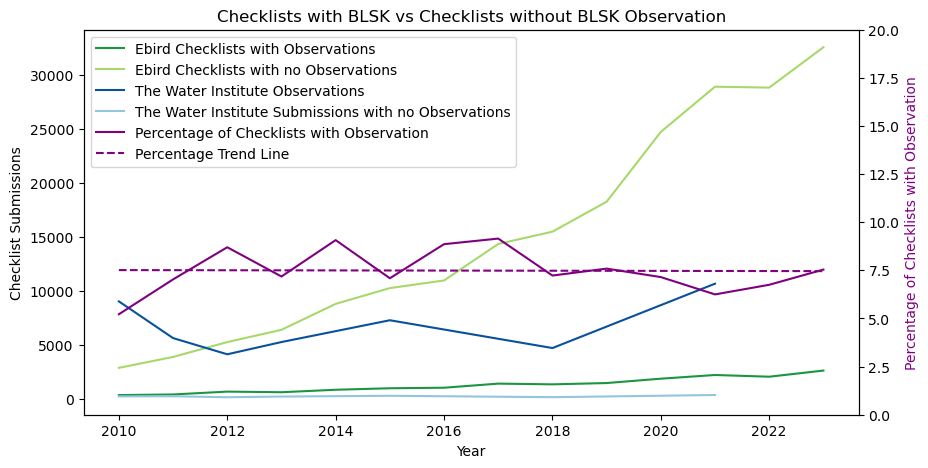

In [83]:
# Loop through unique table_names to plot each as a separate line
colors = ['#1a9641', '#a6d96a', '#08519c', '#92c5de']

fig, ax1 = plt.subplots(figsize=(10, 5))

for i, table in enumerate(observation_counts['table_name'].unique()):
    table_data = observation_counts[observation_counts['table_name'] == table]
    ax1.plot(table_data['year'], table_data['checklist_count'], label=['Ebird Checklists with Observations', 'Ebird Checklists with no Observations', 'The Water Institute Observations', 'The Water Institute Submissions with no Observations'][i], color=colors[i])

# Calculate and plot percentages

ax2 = ax1.twinx()
ax2.plot(observation_counts_totals['year'], observation_counts_totals['percent_present'], label='Percentage of Checklists with Observation', color='purple')

# Fit a trend line to the percentage data
z = np.polyfit(observation_counts_totals['year'], observation_counts_totals['percent_present'], 1)
p = np.poly1d(z)
ax2.plot(observation_counts_totals['year'], p(observation_counts_totals['year']), label='Percentage Trend Line', linestyle='--', color='purple')

# Labels, legends, and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Checklist Submissions')
ax2.set_ylabel('Percentage of Checklists with Observation', color='purple')
ax2.set_ylim(0, 20)

# Legends and title
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best')
plt.title('Checklists with BLSK vs Checklists without BLSK Observation')

plt.show()

In [84]:
ebird_observation_counts = observation_counts[observation_counts['table_name'].str.contains('ebird')]
ebird_observation_counts

table_name  year  checklist_count  presence_count
0        ebird_obs  2010              387             387
1        ebird_obs  2011              445             445
2        ebird_obs  2012              709             709
3        ebird_obs  2013              653             653
4        ebird_obs  2014              881             881
5        ebird_obs  2015             1020            1020
6        ebird_obs  2016             1069            1069
7        ebird_obs  2017             1449            1449
8        ebird_obs  2018             1382            1382
9        ebird_obs  2019             1502            1502
10       ebird_obs  2020             1906            1906
11       ebird_obs  2021             2248            2248
12       ebird_obs  2022             2089            2089
13       ebird_obs  2023             2658            2658
14  ebird_sampling  2010             2909               0
15  ebird_sampling  2011             3921               0
16  ebird_sampling  2012             5292               0
17  ebird_sampling  2013             6431               0
18  ebird_sampling  2014             8831               0
19  ebird_sampling  2015            10292               0
20  ebird_sampling  2016            10997               0
21  ebird_sampling  2017            14379               0
22  ebird_sampling  2018            15514               0
23  ebird_sampling  2019            18287               0
24  ebird_sampling  2020            24751               0
25  ebird_sampling  2021            28933               0
26  ebird_sampling  2022            28850               0
27  ebird_sampling  2023            32588               0

In [85]:
ebird_observation_counts_totals = ebird_observation_counts.groupby('year').agg({'checklist_count': 'sum', 'presence_count': 'sum'}).reset_index()
ebird_observation_counts_totals['percent_present'] = (ebird_observation_counts_totals['presence_count'] / ((ebird_observation_counts_totals['checklist_count']) + (ebird_observation_counts_totals['presence_count'])) * 100).round(2)
ebird_observation_counts_totals

year  checklist_count  presence_count  percent_present
0   2010             3296             387            10.51
1   2011             4366             445             9.25
2   2012             6001             709            10.57
3   2013             7084             653             8.44
4   2014             9712             881             8.32
5   2015            11312            1020             8.27
6   2016            12066            1069             8.14
7   2017            15828            1449             8.39
8   2018            16896            1382             7.56
9   2019            19789            1502             7.05
10  2020            26657            1906             6.67
11  2021            31181            2248             6.72
12  2022            30939            2089             6.32
13  2023            35246            2658             7.01

In [86]:
twi_observation_counts = observation_counts[observation_counts['table_name'].str.contains('twi')]
twi_observation_counts

table_name  year  checklist_count  presence_count
28    twi_abs  2010             9061               0
29    twi_abs  2011             5663               0
30    twi_abs  2012             4164               0
31    twi_abs  2013             5298               0
32    twi_abs  2015             7315               0
33    twi_abs  2018             4742               0
34    twi_abs  2021            10700               0
35   twi_pres  2010              269             272
36   twi_pres  2011              280             280
37   twi_pres  2012              190             192
38   twi_pres  2013              252             254
39   twi_pres  2015              323             323
40   twi_pres  2018              194             197
41   twi_pres  2021              396             396

In [87]:
twi_observation_counts_totals = twi_observation_counts.groupby('year').agg({'checklist_count': 'sum', 'presence_count': 'sum'}).reset_index()
twi_observation_counts_totals['percent_present'] = ((twi_observation_counts_totals['presence_count'] / (twi_observation_counts_totals['checklist_count'] + twi_observation_counts_totals['presence_count'])) * 100).round(2)
twi_observation_counts_totals

year  checklist_count  presence_count  percent_present
0  2010             9330             272             2.83
1  2011             5943             280             4.50
2  2012             4354             192             4.22
3  2013             5550             254             4.38
4  2015             7638             323             4.06
5  2018             4936             197             3.84
6  2021            11096             396             3.45

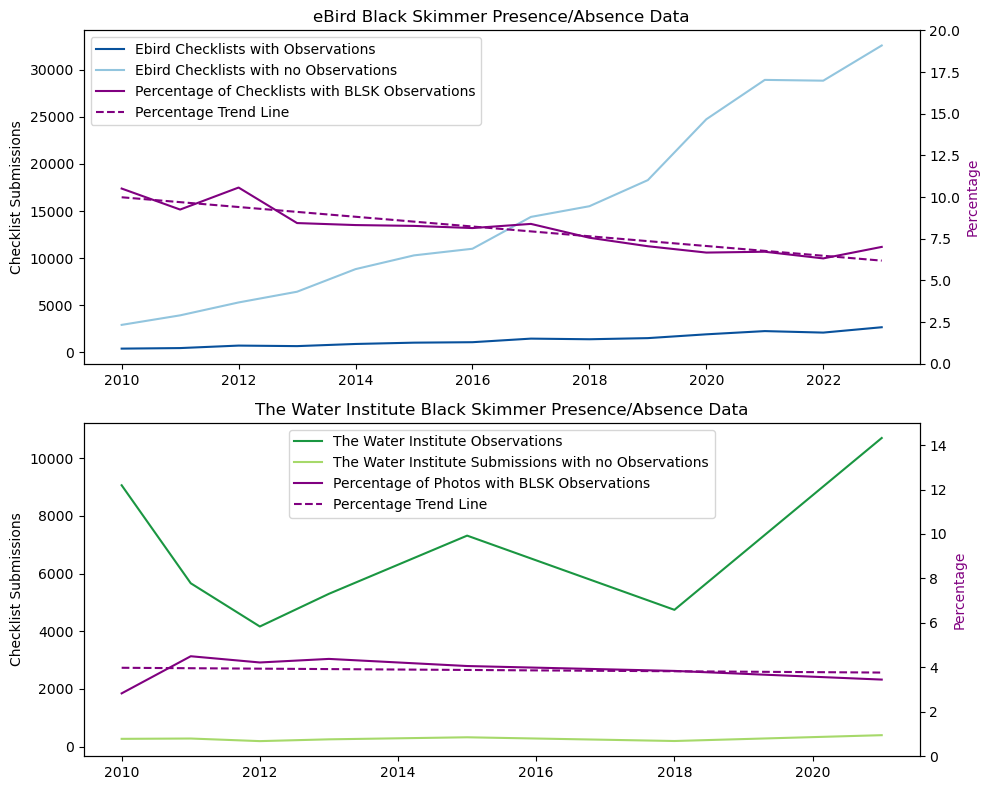

In [88]:
# Create subplots for eBird and The Water Institute data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Loop through unique table_names to plot each as a separate line for eBird data
ebird_data = observation_counts[observation_counts['table_name'].str.contains('ebird')]
colors = ['#08519c', '#92c5de']
for i, table in enumerate(ebird_data['table_name'].unique()):
    table_data = ebird_data[ebird_data['table_name'] == table]
    ax1.plot(table_data['year'], table_data['checklist_count'], label=['Ebird Checklists with Observations', 'Ebird Checklists with no Observations'][i], color=colors[i])

# Plot percentages 

ax1_right = ax1.twinx()
ax1_right.plot(ebird_observation_counts_totals['year'], ebird_observation_counts_totals['percent_present'], label='Percentage of Checklists with BLSK Observations', color='purple')

# plot trend line for percentages
z = np.polyfit(ebird_observation_counts_totals['year'], ebird_observation_counts_totals['percent_present'], 1)
p = np.poly1d(z)
ax1_right.plot(ebird_observation_counts_totals['year'], p(ebird_observation_counts_totals['year']), label='Percentage Trend Line', linestyle='--', color='purple')


# Loop through unique table_names to plot each as a separate line for The Water Institute data
water_institute_data = observation_counts[observation_counts['table_name'].str.contains('twi')]
colors = ['#1a9641', '#a6d96a']
for i, table in enumerate(water_institute_data['table_name'].unique()):
    table_data = water_institute_data[water_institute_data['table_name'] == table]
    ax2.plot(table_data['year'], table_data['checklist_count'], label=['The Water Institute Observations', 'The Water Institute Submissions with no Observations'][i], color=colors[i])

# Plot percentages
ax2_right = ax2.twinx()
ax2_right.plot(twi_observation_counts_totals['year'], twi_observation_counts_totals['percent_present'], label='Percentage of Photos with BLSK Observations', color='purple')

# plot trend line on precentages
z = np.polyfit(twi_observation_counts_totals['year'], twi_observation_counts_totals['percent_present'], 1)
p = np.poly1d(z)
ax2_right.plot(twi_observation_counts_totals['year'], p(twi_observation_counts_totals['year']), label='Percentage Trend Line', linestyle='--', color='purple')

# Set labels, legends, and title for eBird data
# ax1.set_xlabel('Year')

ax1_right.set_ylabel('Percentage', color='purple')  # Right y-axis label
ax1_right.set_ylim(0,20)
ax1.set_ylabel('Checklist Submissions')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_right.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')
ax1.set_title('eBird Black Skimmer Presence/Absence Data')

# Set labels, legends, and title for The Water Institute data
# ax2.set_xlabel('Year')

ax2_right.set_ylabel('Percentage', color='purple')  # Right y-axis label
ax2_right.set_ylim(0,15)
ax2.set_ylabel('Checklist Submissions')
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_right.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='best')
ax2.set_title('The Water Institute Black Skimmer Presence/Absence Data')

# Save the figure
plt.savefig('pres_abs.png', dpi=300, bbox_inches='tight')

# output
plt.tight_layout()
plt.show()


### Exploring individual Counts and Density of Birds Per Checklist

In [89]:
ebird_checklists_gdf = pres_abs_gdf[pres_abs_gdf['table_name'].str.contains('ebird')]
ebird_checklist_sums_gdf = ebird_checklists_gdf.groupby('year').agg({'presence': 'sum', 'count':'sum'}).reset_index()
ebird_checklist_sums_gdf['avg'] = (ebird_checklist_sums_gdf['count'] / ebird_checklist_sums_gdf ['presence']).round(2)
ebird_checklist_sums_gdf

year  presence    count    avg
0   2010       387  24679.0  63.77
1   2011       445  19832.0  44.57
2   2012       709  17413.0  24.56
3   2013       653  18959.0  29.03
4   2014       881  30408.0  34.52
5   2015      1020  38774.0  38.01
6   2016      1069  33979.0  31.79
7   2017      1449  39628.0  27.35
8   2018      1382  38607.0  27.94
9   2019      1502  50587.0  33.68
10  2020      1906  48978.0  25.70
11  2021      2248  68886.0  30.64
12  2022      2089  61157.0  29.28
13  2023      2658  85814.0  32.29

In [90]:
twi_checklists_gdf = pres_abs_gdf[pres_abs_gdf['table_name'].str.contains('twi')]
twi_checklist_sums_gdf = twi_checklists_gdf.groupby('year').agg({'presence': 'sum', 'count':'sum'}).reset_index()
twi_checklist_sums_gdf['avg'] = (twi_checklist_sums_gdf['count'] / twi_checklist_sums_gdf ['presence']).round(2)
twi_checklist_sums_gdf

year  presence    count    avg
0  2010       272  14907.0  54.81
1  2011       280  18361.0  65.58
2  2012       192  15371.0  80.06
3  2013       254  16081.0  63.31
4  2015       323  12112.0  37.50
5  2018       197  10483.0  53.21
6  2021       396  20561.0  51.92

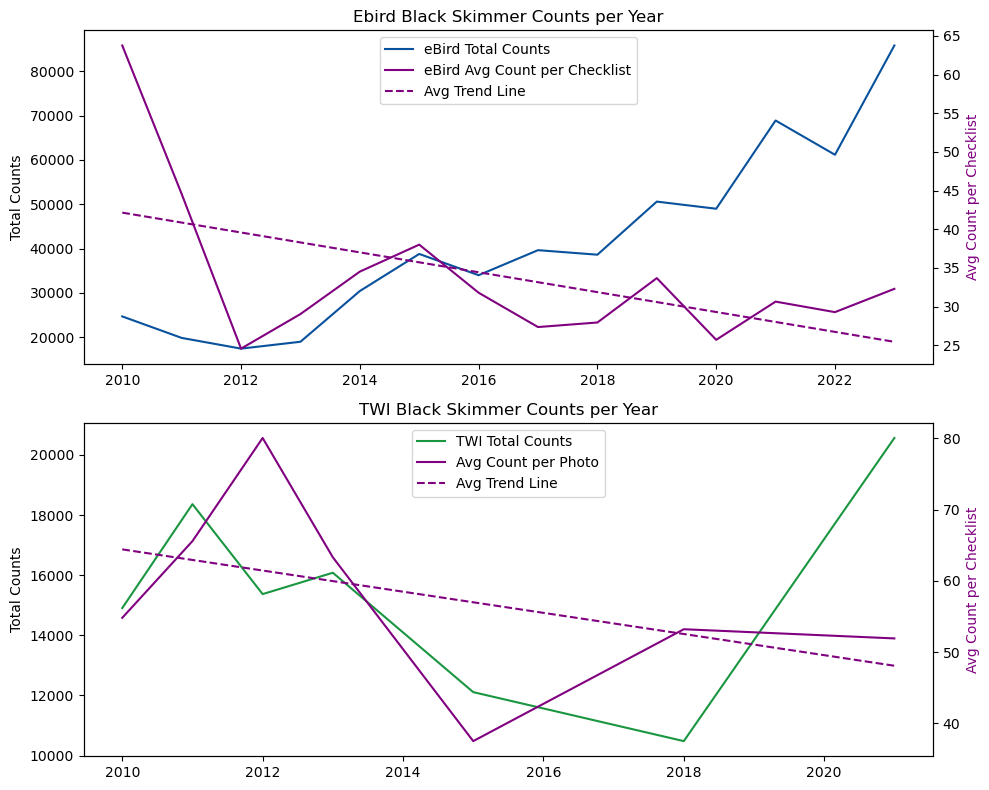

In [91]:
# Create subplots for eBird and The Water Institute data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
#fig, ax1 = plt.subplots(figsize=(10,8))

# eBird total sum per year
ax1.plot(ebird_checklist_sums_gdf['year'], ebird_checklist_sums_gdf['count'], label='eBird Total Counts', color='#08519c')

# eBird Avg sum per checklist
ax1_right = ax1.twinx()
ax1_right.plot(ebird_checklist_sums_gdf['year'], ebird_checklist_sums_gdf['avg'], label='eBird Avg Count per Checklist', color='purple')

# ebird trend line

z = np.polyfit(ebird_checklist_sums_gdf['year'], ebird_checklist_sums_gdf['avg'], 1)
p = np.poly1d(z)
ax1_right.plot(ebird_checklist_sums_gdf['year'], p(ebird_checklist_sums_gdf['year']), label='Avg Trend Line', linestyle='--', color='purple')

# set legend and titles for ebird data
ax1_right.set_ylabel('Avg Count per Checklist', color='purple')  # Right y-axis label
ax1.set_ylabel('Total Counts')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_right.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center')
ax1.set_title('Ebird Black Skimmer Counts per Year')

# twi total sum per checklist
ax2.plot(twi_checklist_sums_gdf['year'], twi_checklist_sums_gdf['count'], label='TWI Total Counts', color='#1a9641')

#plot twi avg count per photo
ax2_right = ax2.twinx()
ax2_right.plot(twi_checklist_sums_gdf['year'], twi_checklist_sums_gdf['avg'], label='Avg Count per Photo', color='purple')

# plot twi trend line
z = np.polyfit(twi_checklist_sums_gdf['year'], twi_checklist_sums_gdf['avg'], 1)
p = np.poly1d(z)
ax2_right.plot(twi_checklist_sums_gdf['year'], p(twi_checklist_sums_gdf['year']), label='Avg Trend Line', linestyle='--', color='purple')

# set legend and titles for twi data
ax2_right.set_ylabel('Avg Count per Checklist', color='purple')  # Right y-axis label
ax2.set_ylabel('Total Counts')
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_right.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper center')
ax2.set_title('TWI Black Skimmer Counts per Year')


#output
plt.tight_layout()
plt.show()

In [92]:
pres_abs_2010 = pres_abs_gdf[pres_abs_gdf['year'] == 2010]
ebird_pres_2010 = pres_abs_2010[pres_abs_2010['table_name'] == 'ebird_obs']
ebird_pres_2010.sort_values(by='count', ascending=False)

state        lat        lon       date  \
128865    LA  29.044915 -90.824318 2010-05-20   
128867    LA  29.046866 -90.824318 2010-05-20   
127797    LA  29.312000 -89.687000 2010-06-24   
55528     FL  27.617352 -82.125801 2010-05-09   
24780     FL  26.006344 -81.739998 2010-06-08   
...      ...        ...        ...        ...   
190192    TX  27.446569 -97.296504 2010-05-27   
190193    TX  27.424424 -97.297325 2010-05-16   
192167    TX  27.827530 -97.078956 2010-05-02   
192179    TX  27.755178 -97.120857 2010-05-08   
192186    TX  27.708527 -97.337972 2010-06-20   

                                                   gui  \
128865   URN:CornellLabOfOrnithology:EBIRD:OBS92791744   
128867   URN:CornellLabOfOrnithology:EBIRD:OBS92640959   
127797  URN:CornellLabOfOrnithology:EBIRD:OBS325204375   
55528    URN:CornellLabOfOrnithology:EBIRD:OBS91747443   
24780   URN:CornellLabOfOrnithology:EBIRD:OBS266593405   
...                                                ...   
190192  URN:CornellLabOfOrnithology:EBIRD:OBS445859832   
190193  URN:CornellLabOfOrnithology:EBIRD:OBS330569452   
192167  URN:CornellLabOfOrnithology:EBIRD:OBS238395862   
192179  URN:CornellLabOfOrnithology:EBIRD:OBS102935506   
192186   URN:CornellLabOfOrnithology:EBIRD:OBS94457777   

                          geometry  presence   count table_name  year  
128865  POINT (-90.82432 29.04491)         1  1960.0  ebird_obs  2010  
128867  POINT (-90.82432 29.04687)         1  1355.0  ebird_obs  2010  
127797  POINT (-89.68700 29.31200)         1  1200.0  ebird_obs  2010  
55528   POINT (-82.12580 27.61735)         1  1045.0  ebird_obs  2010  
24780   POINT (-81.74000 26.00634)         1  1029.0  ebird_obs  2010  
...                            ...       ...     ...        ...   ...  
190192  POINT (-97.29650 27.44657)         1     NaN  ebird_obs  2010  
190193  POINT (-97.29733 27.42442)         1     NaN  ebird_obs  2010  
192167  POINT (-97.07896 27.82753)         1     NaN  ebird_obs  2010  
192179  POINT (-97.12086 27.75518)         1     NaN  ebird_obs  2010  
192186  POINT (-97.33797 27.70853)         1     NaN  ebird_obs  2010  

[387 rows x 10 columns]

### Exploring the Breeding information available in our datasets.

In [93]:
twi_blsk_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1914 entries, 1173 to 49142
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1914 non-null   datetime64[ns]
 1   ColonyName             1914 non-null   object        
 2   ChickNestwithoutAdult  1913 non-null   float64       
 3   AbandNest              1914 non-null   float64       
 4   EmptyNest              1914 non-null   float64       
 5   Brood                  1914 non-null   float64       
 6   Chicks/Nestlings       272 non-null    float64       
 7   RoostingBirds          998 non-null    float64       
 8   RoostingAdults         998 non-null    float64       
 9   RoostingImmatures      998 non-null    float64       
 10  UnknownAge             998 non-null    float64       
 11  ColonyID               1914 non-null   object        
 12  state                  1914 non-null   object        
 

In [94]:
#exploring the breeding information from the twi dataset
# Checking Brood column
twi_blsk_gdf['Brood'].value_counts().reset_index(name='count')

Brood  count
0    0.0   1911
1    7.0      1
2    3.0      1
3   15.0      1

In [95]:
# Brood is mostly 0 or null dropping that columns
twi_blsk_gdf.drop(columns='Brood', axis=1, inplace=True)
# Checking ChicksNestwithoutAdult
twi_blsk_gdf['ChickNestwithoutAdult'].value_counts().reset_index(name='count')


ChickNestwithoutAdult  count
0                    0.0   1913

In [96]:
# ChecksNestwithoutAdult is all 0 counts so i will drop it.
twi_blsk_gdf.drop(columns='ChickNestwithoutAdult', axis=1, inplace=True)
# Checking AbandNest column
twi_blsk_gdf['AbandNest'].value_counts().reset_index(name='count')

AbandNest  count
0        0.0   1911
1        1.0      2
2        3.0      1

In [97]:
# AbandNest was almost all 0 values. dropping
twi_blsk_gdf.drop(columns='AbandNest', axis=1, inplace=True)

# Checking EmptyNest columns
twi_blsk_gdf['EmptyNest'].value_counts().reset_index(name='count')


EmptyNest  count
0        0.0   1911
1        6.0      1
2        2.0      1
3        3.0      1

In [98]:
# EmptyNest was almost all 0 values. dropping
twi_blsk_gdf.drop(columns='EmptyNest', axis=1, inplace=True)

# Checking 


In [99]:
# checking the values in the breeding that are present in the data

filtered_ebird_blsk_may_june_gdf['breeding_code'].value_counts().reset_index(name='count')


breeding_code  count
0             ON     94
1             F      62
2             NE     60
3             NY     58
4             FL     27
5             H      22
6             FY     21
7             C      17
8             NB     12
9             CF     11
10            N       9
11            P       7
12            A       6
13            UN      2
14            PE      1

* ON--Occupied Nest – Occupied nest presumed by parent entering and remaining, 
exchanging incubation duties, etc. Typically considered Confirmed.
* F--Flyover – Flying over only. This is not necessarily a breeding code, but can be a useful 
behavioral distinction.
* NE--Nest with Eggs – Nest with eggs. Typically considered Confirmed.  
* NY--Nest with Young – Nest with young seen or heard. Typically considered Confirmed.
* FL--Recently Fledged young – Recently fledged or downy young observed while still 
dependent upon adults. Typically considered Confirmed.
* H--In appropriate habitat – Adult in suitable nesting habitat during its breeding season. 
Typically considered Possible. 
* FY--Feeding Young – Adult feeding young that have left the nest, but are not yet flying 
and independent (should not be used with raptors, terns, and other species that may 
move many miles from the nest site). Typically considered Confirmed. 
* C--Courtship, Display or Copulation – Courtship or copulation observed, including 
displays and courtship feeding. Typically considered Probable. 
* NB--Nest Building – Nest building at apparent nest site (should not be used for certain 
wrens, and other species that build dummy nests). Typically considered Confirmed, 
sometimes Probable.
* CF--Carrying Food – Adult carrying food for young (should not be used for corvids, 
raptors, terns, and certain other species that regularly carry food for courtship or other 
purposes). Typically considered Confirmed. 
* N--Visiting probable Nest site – Visiting repeatedly probable nest site (primarily hole 
nesters). Typically considered Probable. 
* P--Pair in suitable habitat – Pair observed in suitable breeding habitat within breeding 
season. Typically considered Probable. 
* A--Agitated behavior – Agitated behavior or anxiety calls from an adult (ex. "pishing" and 
strong tape responses). Typically considered Probable. 
* UN--Used nest – Unoccupied nest, typically with young already fledged and no longer 
active, observed and conclusively identified as belonging to the entered species; note 
that this breeding code may accompany a count of "0" if no live birds were seen/heard 
on the checklist. Typically considered Confirmed. 
* PE--Brood Patch and Physiological Evidence – Physiological evidence of nesting, usually a 
brood patch. This will be used only very rarely. Typically considered Confirmed. 